In [1]:
%run preparation.py
%matplotlib inline

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<h3>Actin grinding velocity analysis</h3><br># Prepared by Sam., Prof. Nitta Lab.<br># Click <a href="javascript:code_toggle()">HERE</a> to toggle on/off the raw input code.''')

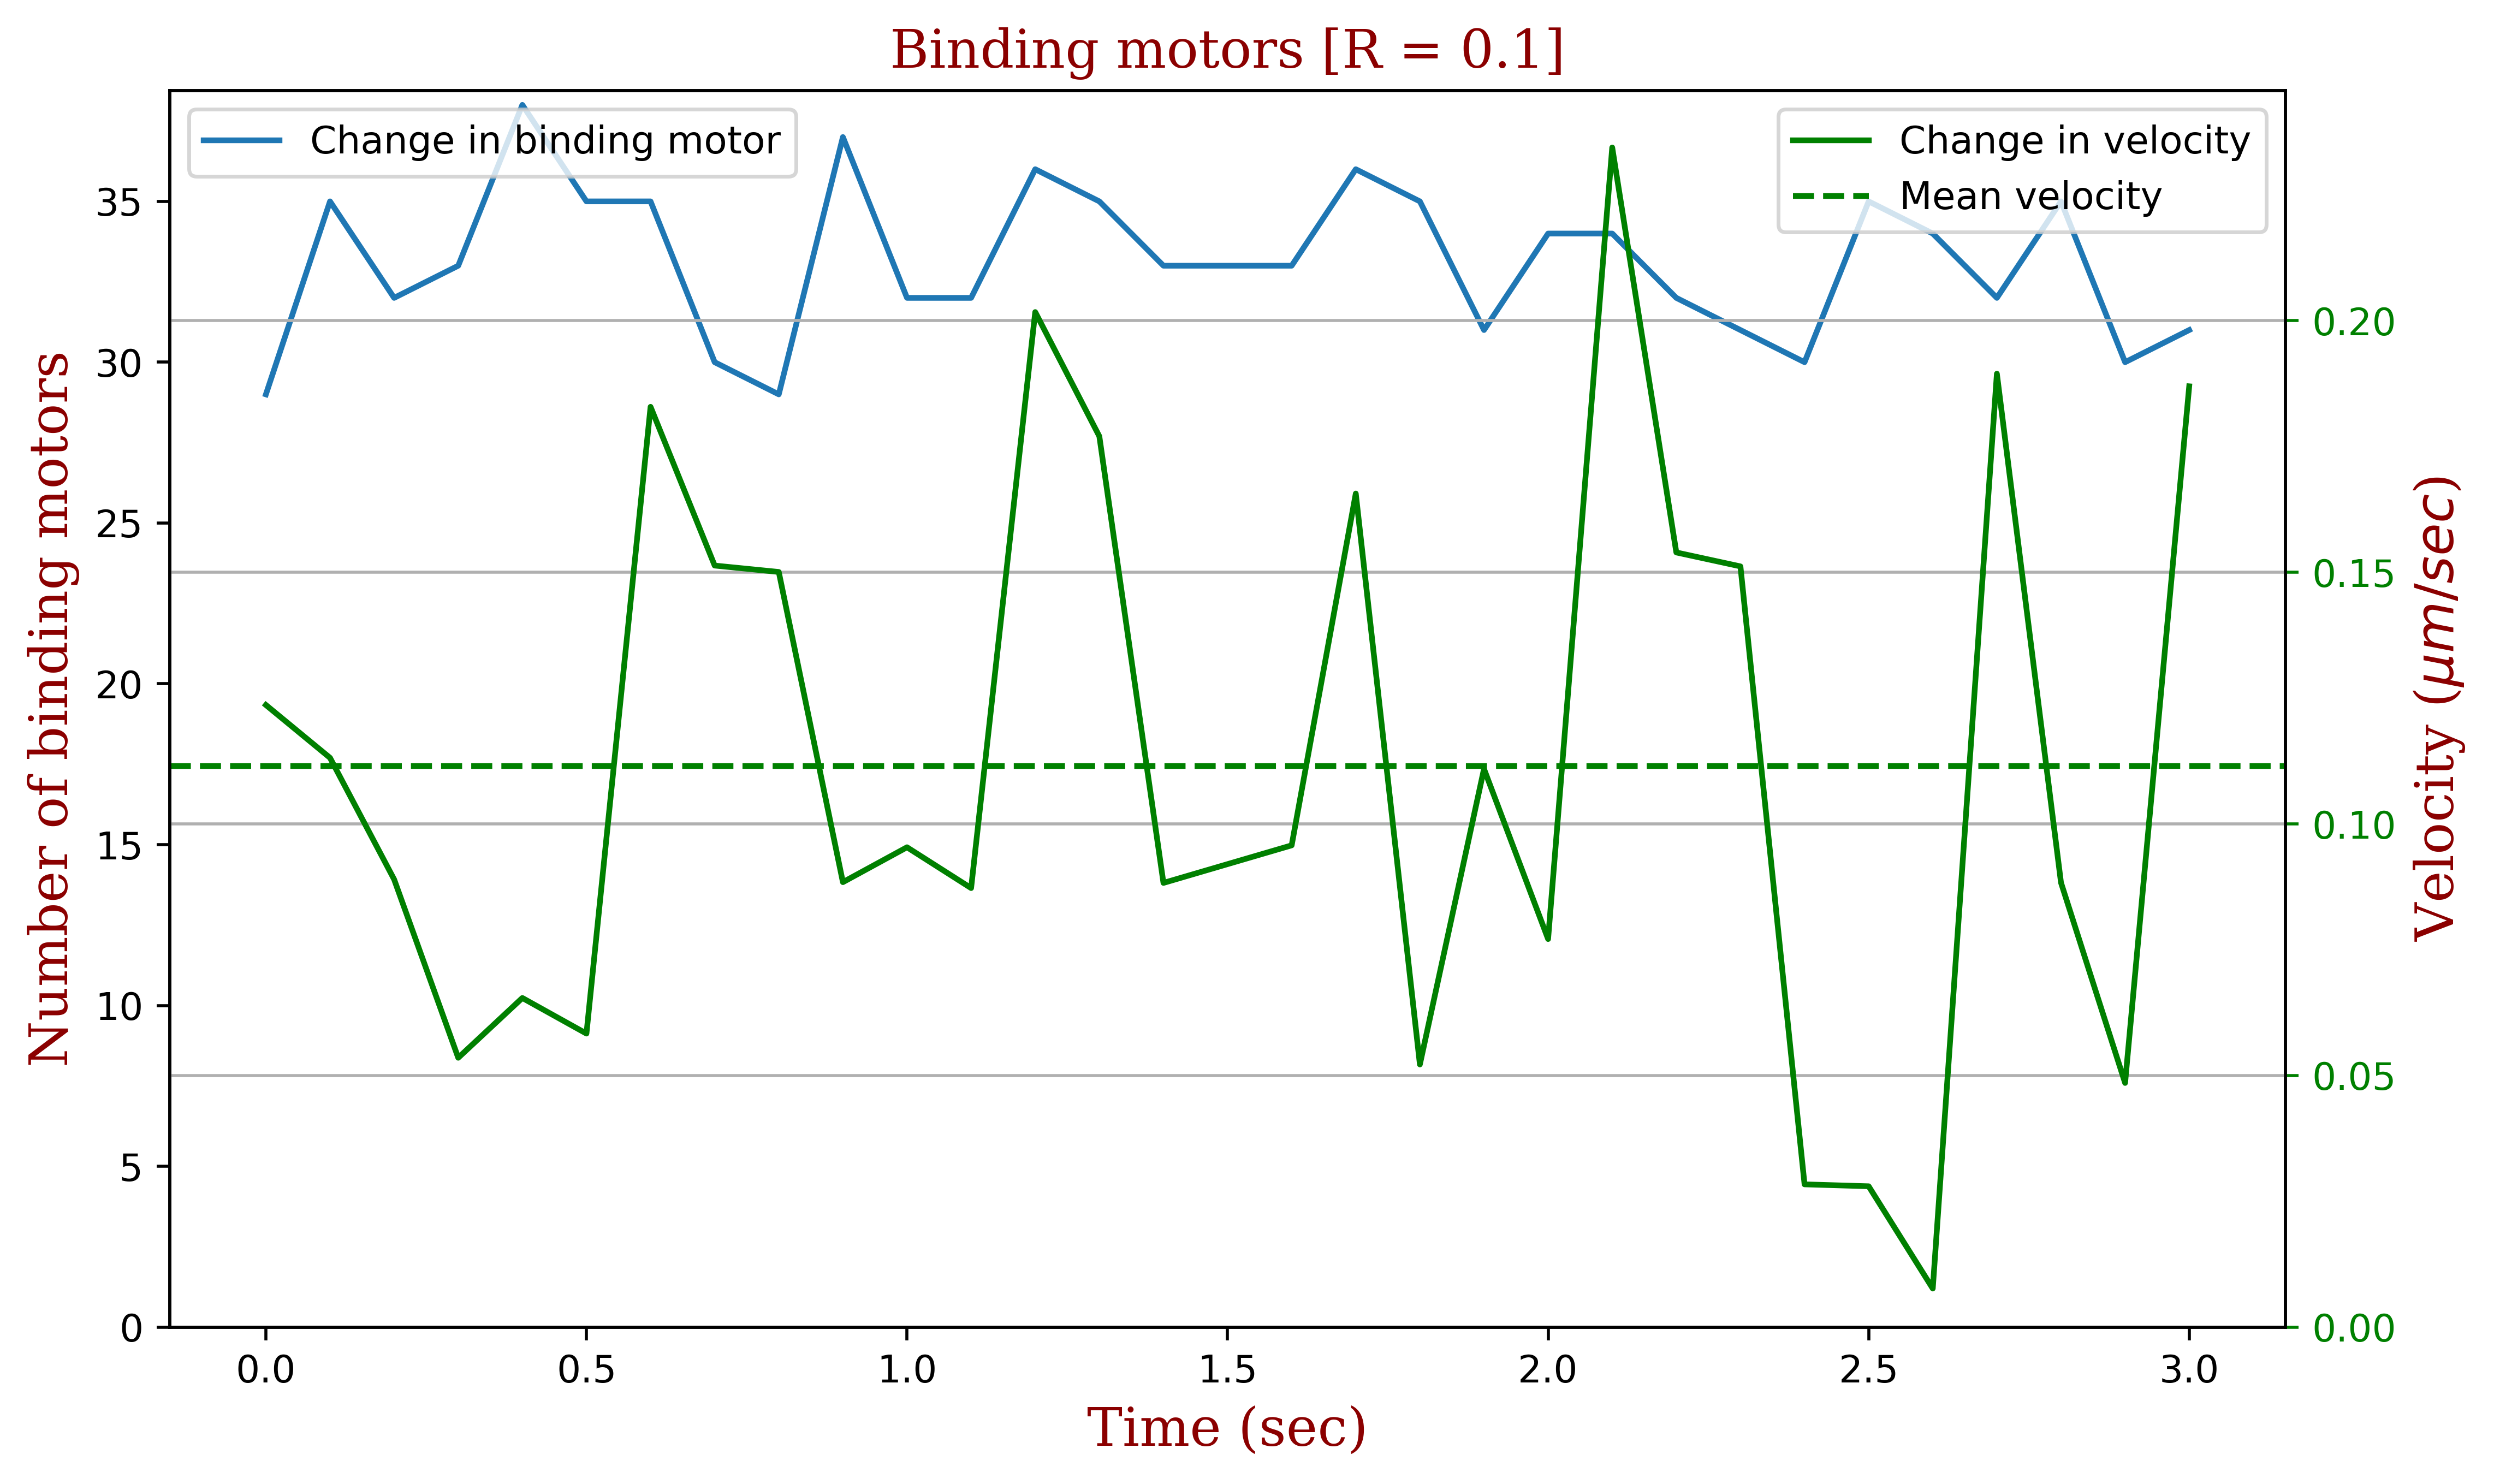

Ave_vel: 0.11145769218848108
VSD: 0.05837063084761927
    time  b_m       vel
0    0.0   29  0.123627
1    0.1   35  0.113133
2    0.2   32  0.088973
3    0.3   33  0.053520
4    0.4   38  0.065406
5    0.5   35  0.058328
6    0.6   35  0.182879
7    0.7   30  0.151337
8    0.8   29  0.150067
9    0.9   37  0.088417
10   1.0   32  0.095354
11   1.1   32  0.087243
12   1.2   36  0.201716
13   1.3   35  0.177028
14   1.4   33  0.088269
15   1.6   33  0.095736
16   1.7   36  0.165651
17   1.8   35  0.052191
18   1.9   31  0.110924
19   2.0   34  0.077114
20   2.1   34  0.234422
21   2.2   32  0.153941
22   2.3   31  0.151175
23   2.4   30  0.028366
24   2.5   35  0.027987
25   2.6   34  0.007658
26   2.7   32  0.189468
27   2.8   35  0.088327
28   2.9   30  0.048514
29   3.0   31  0.186959


In [3]:
Dx_tip = np.diff(bmd01['x']); Dy_tip = np.diff(bmd01['y'])
DD=np.sqrt((Dx_tip**2)+(Dy_tip**2))
v=DD/(10*dt); Av_vel = np.mean(v)
vSD=np.sum(((v-Av_vel)**2)/(np.size(v)-1)); vSD=np.sqrt(vSD)
time = np.around(np.linspace(0,3,30,endpoint=True), decimals=1)
#time = np.around(time, decimals=1)
#print(time)
fig, ax1 = plt.subplots(figsize=(10,6), dpi=500)
ax1.set_xlabel('Time (sec)', fontdict=font)
ax1.set_ylabel('Number of binding motors', fontdict=font)
ax1.plot(time,bm01, label='Change in binding motor')
#ax1.axhline(float(bm01.mean()), linestyle='--')
ax1.legend(loc='upper left')
ax1.set_ylim(bottom=0)

ax2 = ax1.twinx()
ax2.set_xlabel('Time (sec)', fontdict=font)
ax2.set_ylabel('Velocity ($\mu m/sec$)', fontdict=font)
ax2.plot(time,v, 'g', label='Change in velocity')
ax2.axhline(np.mean(v), linestyle='--', color='g', label='Mean velocity')
ax2.legend(loc='upper right')
ax2.tick_params('y', colors='g')
ax2.set_ylim(bottom=0)

plt.title('Binding motors [R = 0.1]', fontdict=font)
plt.grid()

v1 = v.reshape(30,1)
v1 = pd.DataFrame(v1)
tym = pd.DataFrame(time)
bm01_ = bm01.reset_index(drop=True)
nbm01 = pd.concat([tym, bm01_, v1], axis=1)
nbm01.columns=['time','b_m','vel']

plt.show()
fig.savefig('actin_binding_grinding_r0.1.svg',bbox_inches='tight', format='svg')

print(colored('Ave_vel:', 'yellow', attrs=['reverse', 'blink']), \
      colored(Av_vel, 'yellow', attrs=['reverse', 'blink']))
print(colored('VSD:', 'yellow', attrs=['reverse', 'blink']), \
      colored(vSD, 'yellow', attrs=['reverse', 'blink']))
print(nbm01)

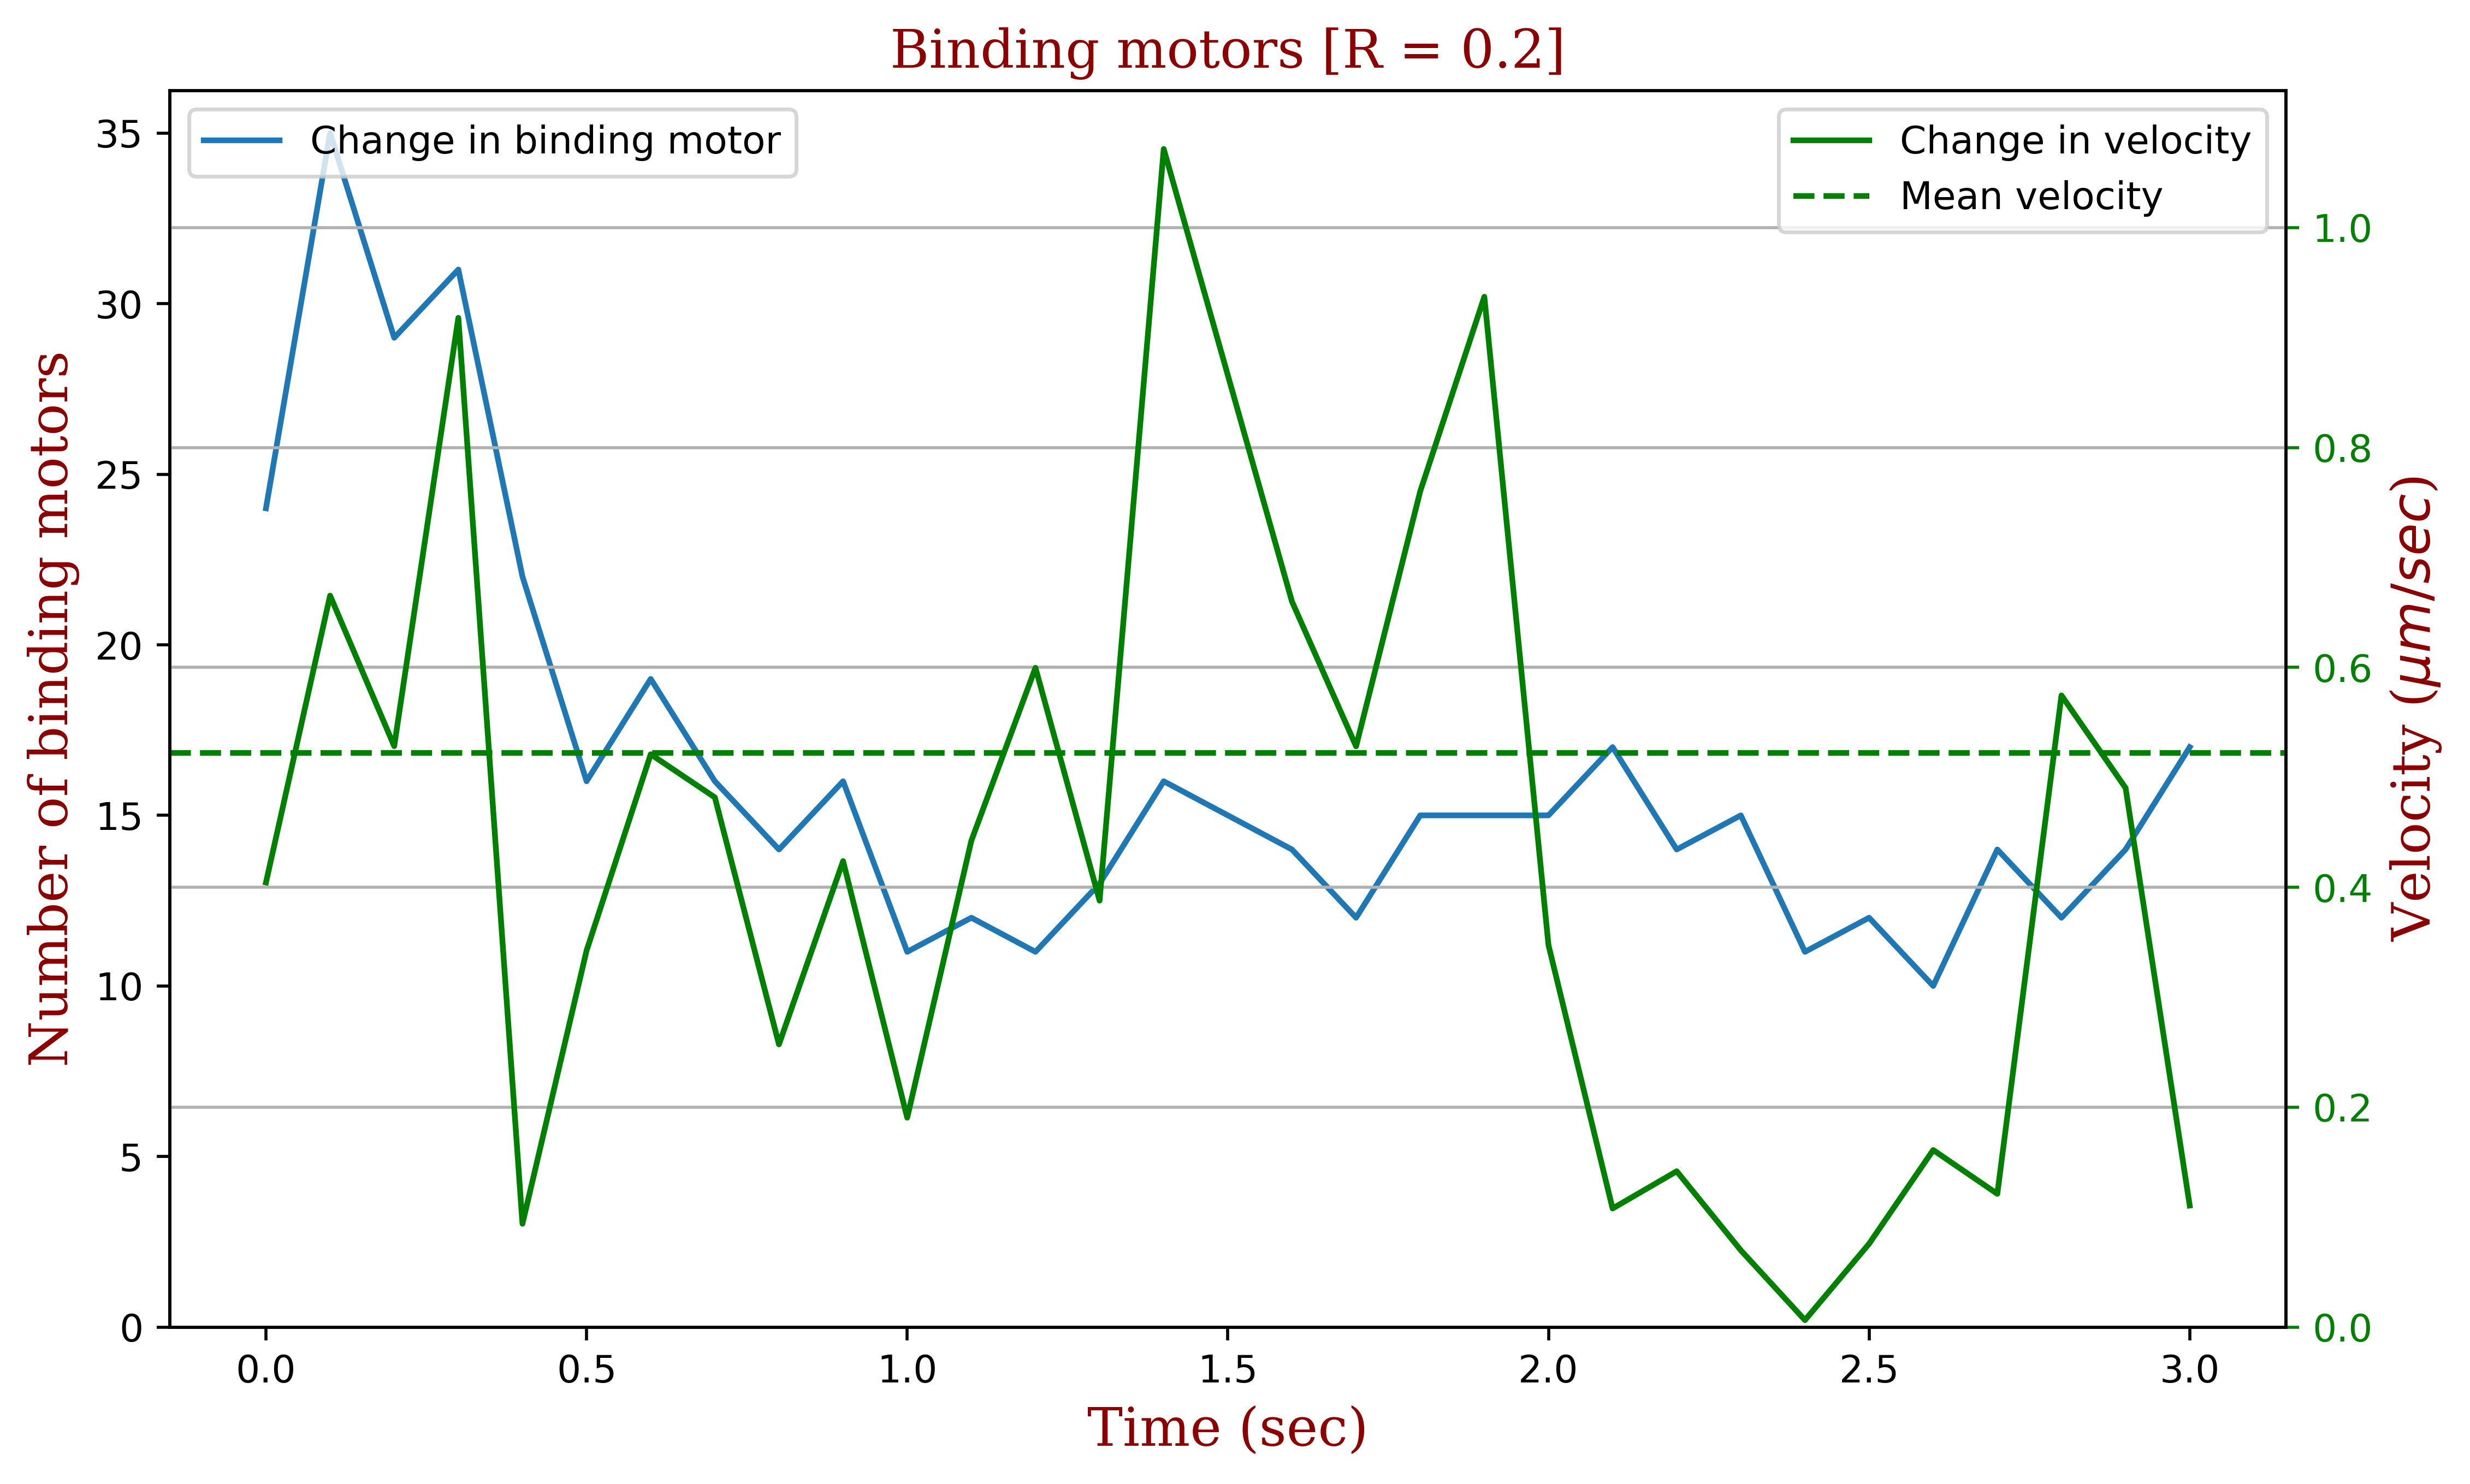

Mean velocity, time[0:0.4] =  0.5219810100764569
bVSD: 0.32889788161751016
    time  b_m       vel
0    0.0   24  0.404354
1    0.1   35  0.665290
2    0.2   29  0.528369
3    0.3   31  0.917935
4    0.4   22  0.093958
5    0.5   16  0.342456
6    0.6   19  0.521006
7    0.7   16  0.481777
8    0.8   14  0.257122
9    0.9   16  0.423836
10   1.0   11  0.190453
11   1.1   12  0.442351
12   1.2   11  0.599642
13   1.3   13  0.387869
14   1.4   16  1.071513
15   1.6   14  0.659919
16   1.7   12  0.528233
17   1.8   15  0.760147
18   1.9   15  0.937131
19   2.0   15  0.347492
20   2.1   17  0.107859
21   2.2   14  0.141729
22   2.3   15  0.069832
23   2.4   11  0.006315
24   2.5   12  0.075805
25   2.6   10  0.161044
26   2.7   14  0.121178
27   2.8   12  0.574528
28   2.9   14  0.490354
29   3.0   17  0.110554


In [4]:
Dx_tip = np.diff(bmd02['x']); Dy_tip = np.diff(bmd02['y'])
DD=np.sqrt((Dx_tip**2)+(Dy_tip**2))
v=DD/(10*dt); Av_vel = np.mean(v)
vSD=np.sum(((v-Av_vel)**2)/(np.size(v)-1)); vSD=np.sqrt(vSD)
time = np.around(np.linspace(0,3,30,endpoint=True), decimals=1)

v1 = v.reshape(30,1)
v1 = pd.DataFrame(v1)
tym = pd.DataFrame(time)
bm02_ = bm02.reset_index(drop=True)
nbm02 = pd.concat([tym, bm02_, v1], axis=1)
nbm02.columns=['time','b_m','vel']
nbm02 = nbm02.loc[nbm02['b_m'] >= 20] # detached number
nbm02 = nbm02.iloc[:,2] # pick column v1
#print(nbm02)
nbm02 = nbm02[0:5]
nv = nbm02; nAv_vel = nbm02.mean()
nvSD=np.sum(((nv-Av_vel)**2)/(np.size(nv)-1)); nvSD=np.sqrt(nvSD)

fig, ax1 = plt.subplots(figsize=(10,6), dpi=500)
ax1.set_xlabel('Time (sec)', fontdict=font)
ax1.set_ylabel('Number of binding motors', fontdict=font)
ax1.plot(time,bm02, label='Change in binding motor')
#ax1.axhline(float(bm01.mean()), linestyle='--')
ax1.legend(loc='upper left')
ax1.set_ylim(bottom=0)

ax2 = ax1.twinx()
ax2.set_xlabel('Time (sec)', fontdict=font)
ax2.set_ylabel('Velocity ($\mu m/sec$)', fontdict=font)
ax2.plot(time,v, 'g', label='Change in velocity')
ax2.axhline(nbm02.mean(), linestyle='--', color='g', label='Mean velocity')
ax2.legend(loc='upper right')
ax2.tick_params('y', colors='g')
ax2.set_ylim(bottom=0)

plt.title('Binding motors [R = 0.2]', fontdict=font)
plt.grid()



plt.show()
fig.savefig('actin_binding_grinding_r0.2.svg',bbox_inches='tight', format='svg')

#print(colored('Ave_vel:', 'yellow', attrs=['reverse', 'blink']), \
#      colored(Av_vel, 'yellow', attrs=['reverse', 'blink']))
#print(colored('VSD:', 'yellow', attrs=['reverse', 'blink']), \
#      colored(vSD, 'yellow', attrs=['reverse', 'blink']))
print(colored('Mean velocity, time[0:0.4] = ', 'yellow', attrs=['reverse', 'blink']), \
      colored(nbm02.mean(), 'yellow', attrs=['reverse', 'blink']))
print(colored('bVSD:', 'yellow', attrs=['reverse', 'blink']), \
      colored(nvSD, 'yellow', attrs=['reverse', 'blink']))

nbm02 = pd.concat([tym, bm02_, v1], axis=1)
nbm02.columns=['time','b_m','vel']
print(nbm02)

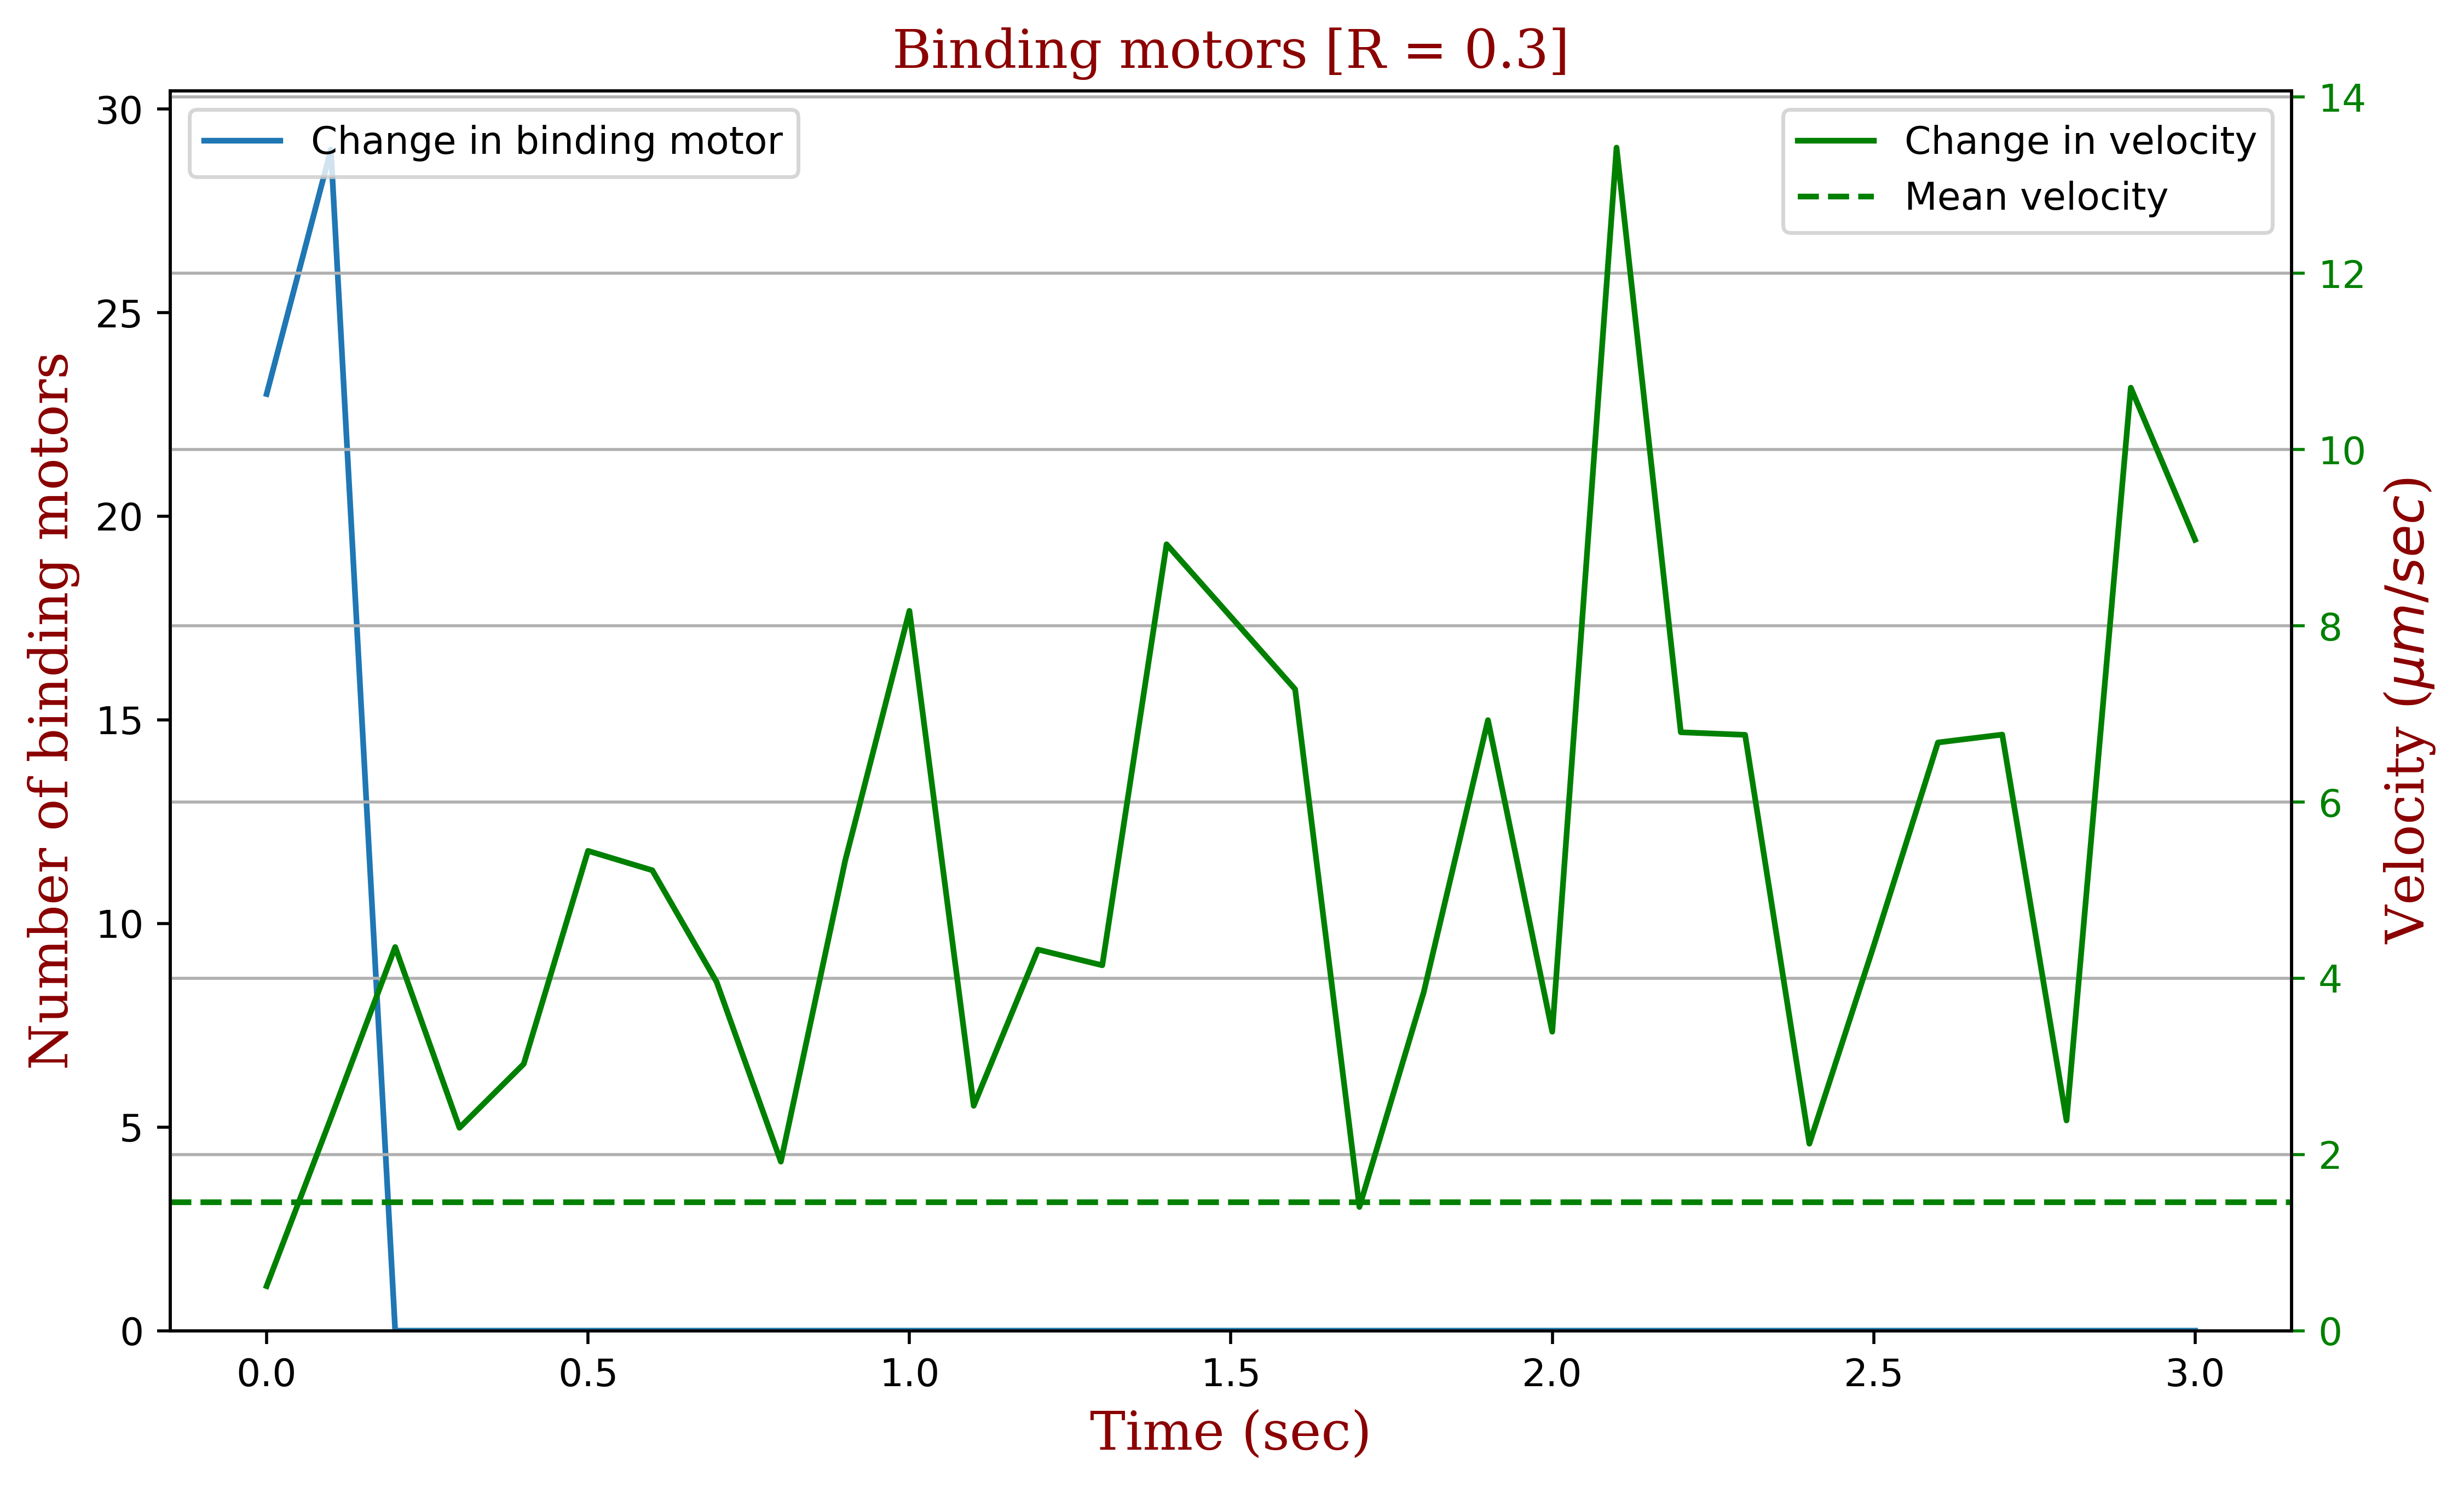

Mean velocity, time[0:0.1] =  1.4593605649067138
bVSD: 1.3485864973743205
    time  b_m        vel
0    0.0   23   0.505766
1    0.1   29   2.412955
2    0.2    0   4.353976
3    0.3    0   2.302287
4    0.4    0   3.027242
5    0.5    0   5.445224
6    0.6    0   5.225139
7    0.7    0   3.958261
8    0.8    0   1.918237
9    0.9    0   5.332490
10   1.0    0   8.169503
11   1.1    0   2.552370
12   1.2    0   4.325067
13   1.3    0   4.147113
14   1.4    0   8.925237
15   1.6    0   7.279846
16   1.7    0   1.403760
17   1.8    0   3.839670
18   1.9    0   6.928746
19   2.0    0   3.392896
20   2.1    0  13.427116
21   2.2    0   6.791536
22   2.3    0   6.762131
23   2.4    0   2.121934
24   2.5    0   4.365594
25   2.6    0   6.675436
26   2.7    0   6.764961
27   2.8    0   2.385981
28   2.9    0  10.701960
29   3.0    0   8.975864


In [5]:
Dx_tip = np.diff(bmd03['x']); Dy_tip = np.diff(bmd03['y'])
DD=np.sqrt((Dx_tip**2)+(Dy_tip**2))
v=DD/(10*dt); Av_vel = np.mean(v)
vSD=np.sum(((v-Av_vel)**2)/(np.size(v)-1)); vSD=np.sqrt(vSD)
time = np.around(np.linspace(0,3,30,endpoint=True), decimals=1)

v1 = v.reshape(30,1)
v1 = pd.DataFrame(v1)
tym = pd.DataFrame(time)
bm03_ = bm03.reset_index(drop=True)
nbm03 = pd.concat([tym, bm03_, v1], axis=1)
nbm03.columns=['time','b_m','vel']
#print(nbm03)
nbm03 = nbm03.loc[nbm03['b_m'] >= 20] # detached number
nbm03 = nbm03.iloc[:,2]
nbm03 = nbm03[0:2]
#print(nbm03)
nv = nbm03; nAv_vel = nbm03.mean()
nvSD=np.sum(((nv-nAv_vel)**2)/(np.size(nv)-1)); nvSD=np.sqrt(nvSD)

fig, ax1 = plt.subplots(figsize=(10,6), dpi=500)
ax1.set_xlabel('Time (sec)', fontdict=font)
ax1.set_ylabel('Number of binding motors', fontdict=font)
ax1.plot(time,bm03, label='Change in binding motor')
#ax1.axhline(float(bm01.mean()), linestyle='--')
ax1.legend(loc='upper left')
ax1.set_ylim(bottom=0)

ax2 = ax1.twinx()
ax2.set_xlabel('Time (sec)', fontdict=font)
ax2.set_ylabel('Velocity ($\mu m/sec$)', fontdict=font)
ax2.plot(time,v, 'g', label='Change in velocity')
ax2.axhline(nbm03.mean(), linestyle='--', color='g', label='Mean velocity')
ax2.legend(loc='upper right')
ax2.tick_params('y', colors='g')
ax2.set_ylim(bottom=0)

plt.title('Binding motors [R = 0.3]', fontdict=font)
plt.grid()



plt.show()
fig.savefig('actin_binding_grinding_r0.3.svg',bbox_inches='tight', format='svg')

#print(colored('Ave_vel:', 'yellow', attrs=['reverse', 'blink']), \
#      colored(Av_vel, 'yellow', attrs=['reverse', 'blink']))
#print(colored('VSD:', 'yellow', attrs=['reverse', 'blink']), \
#      colored(vSD, 'yellow', attrs=['reverse', 'blink']))
print(colored('Mean velocity, time[0:0.1] = ', 'yellow', attrs=['reverse', 'blink']), \
      colored(nbm03.mean(), 'yellow', attrs=['reverse', 'blink']))
print(colored('bVSD:', 'yellow', attrs=['reverse', 'blink']), \
      colored(nvSD, 'yellow', attrs=['reverse', 'blink']))

nbm03 = pd.concat([tym, bm03_, v1], axis=1)
nbm03.columns=['time','b_m','vel']
print(nbm03)

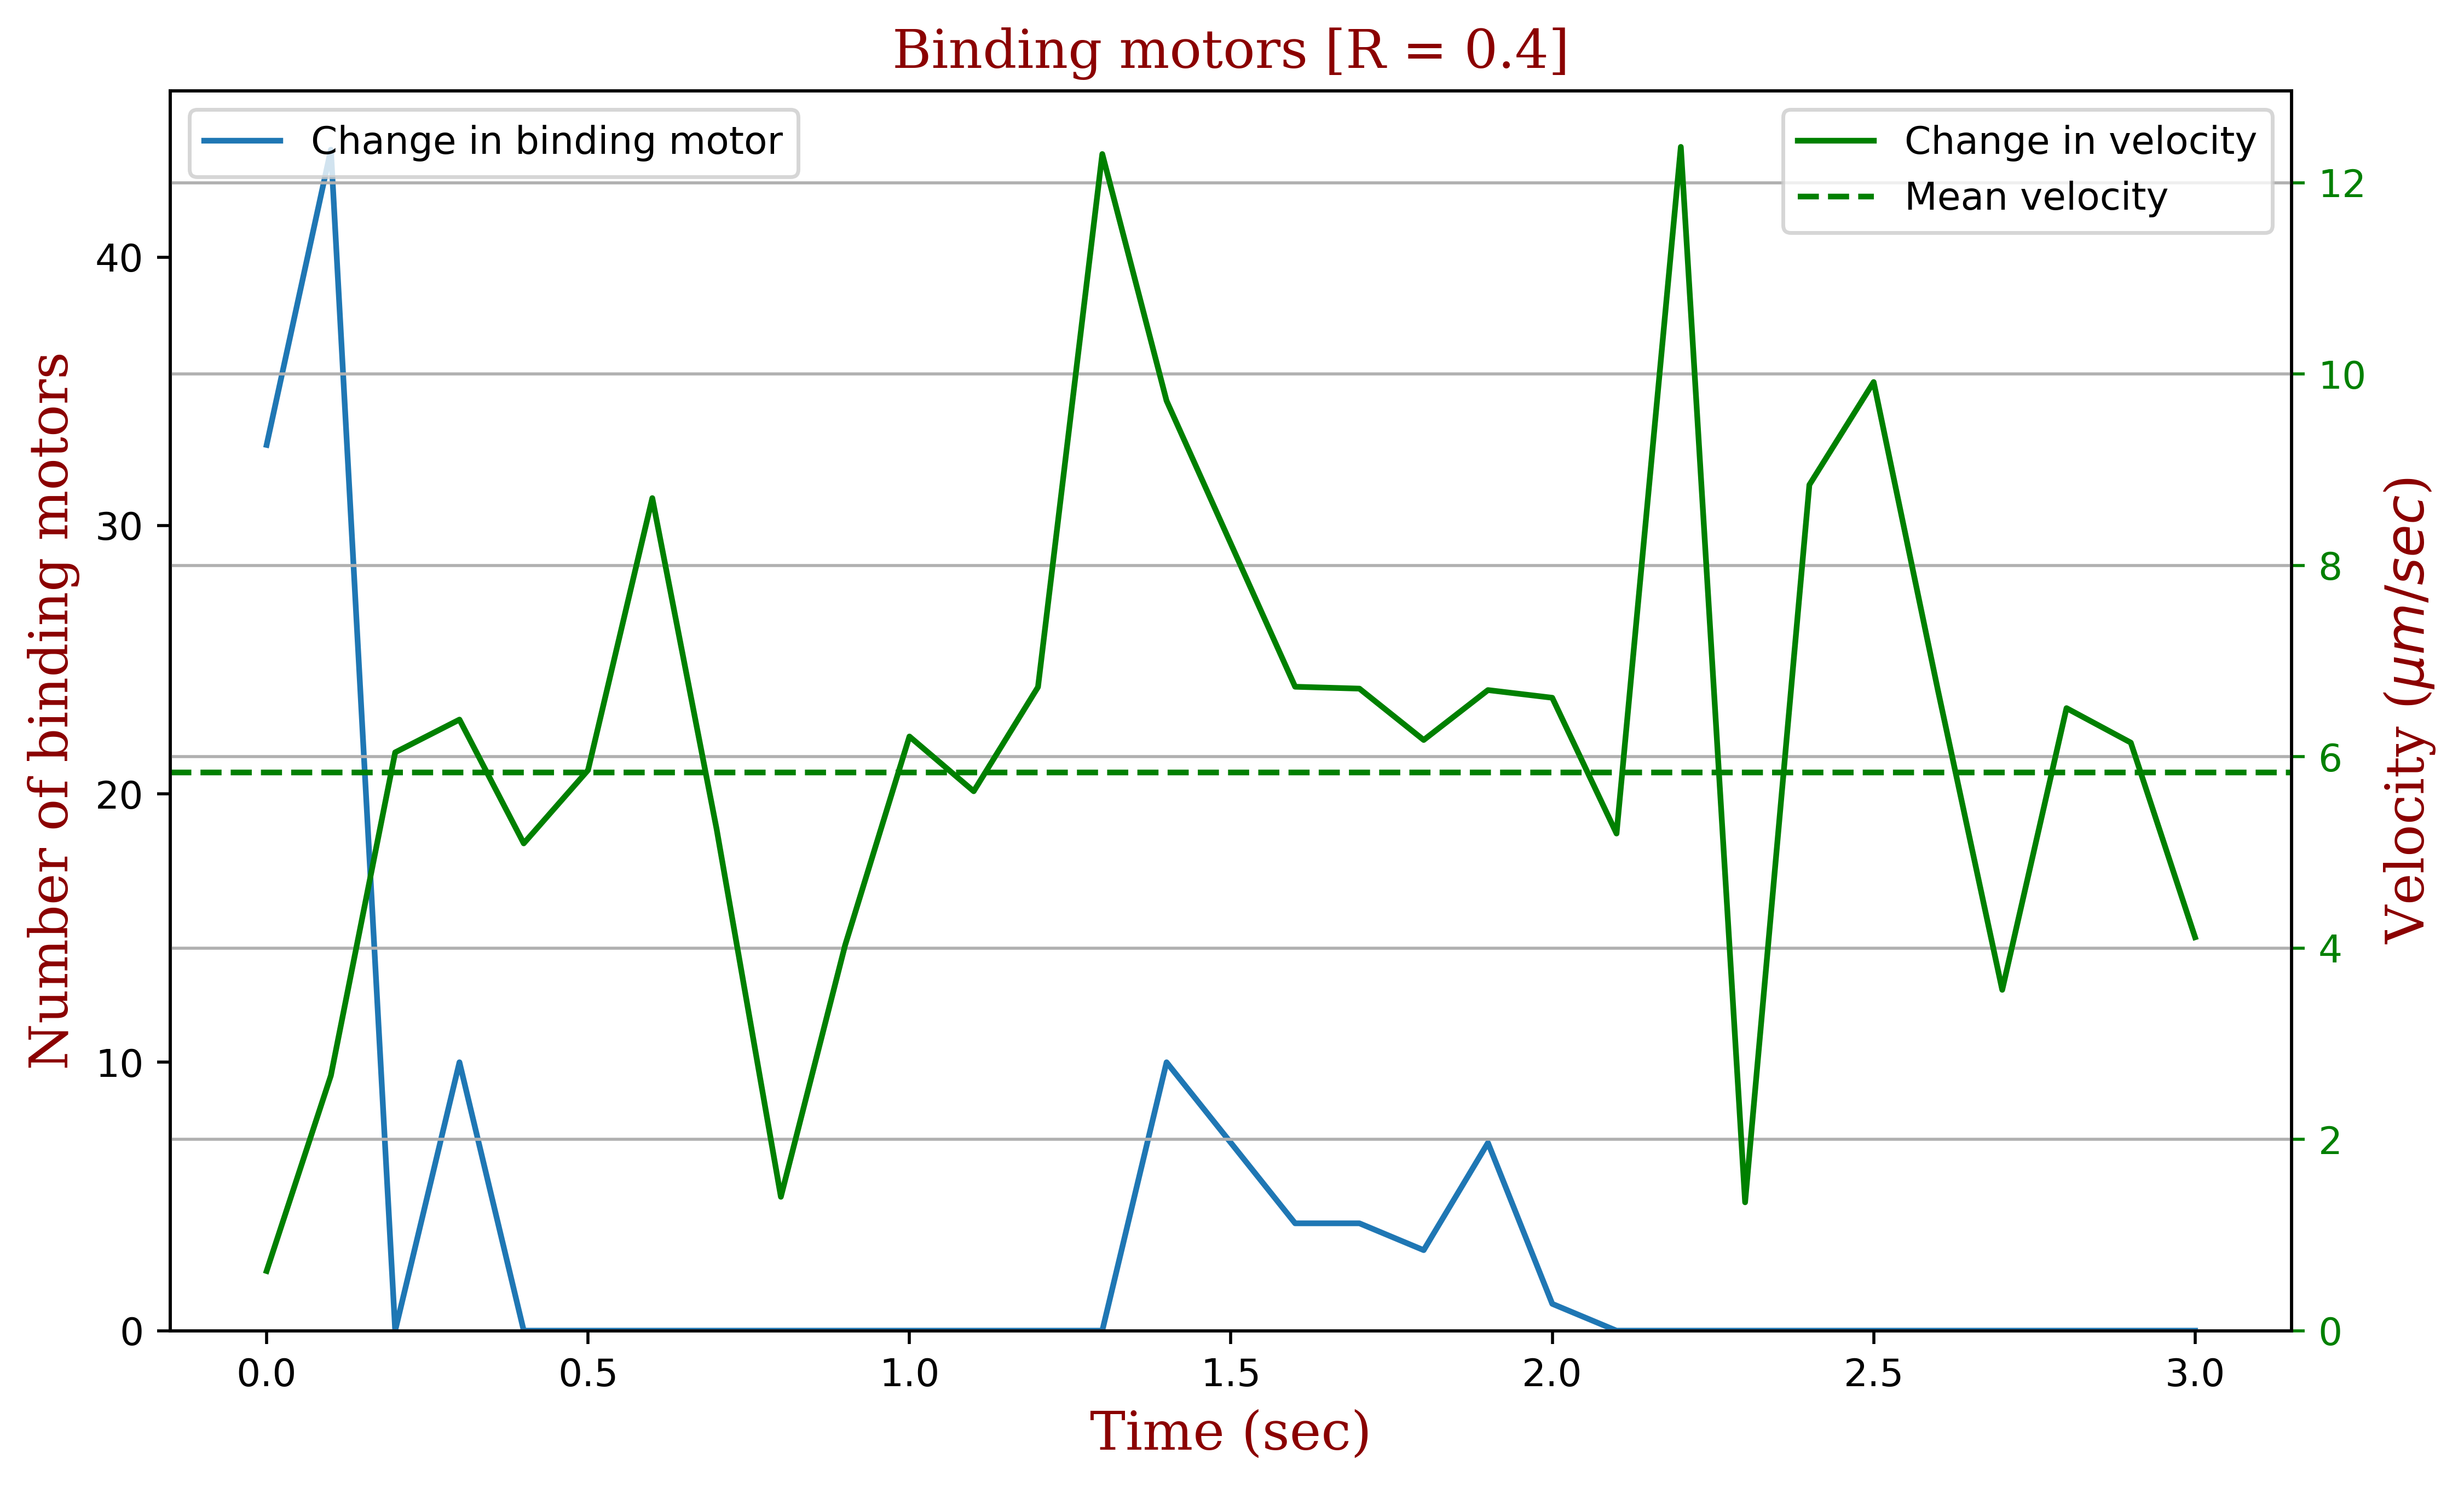

Mean velocity, time[0:0.3, 1.4:2.0] =  5.837942291336978
bVSD: 2.4876001987978986
    time  b_m        vel
0    0.0   33   0.623651
1    0.1   44   2.667296
2    0.2    0   6.045609
3    0.3   10   6.388317
4    0.4    0   5.094125
5    0.5    0   5.859987
6    0.6    0   8.703818
7    0.7    0   5.245573
8    0.8    0   1.399500
9    0.9    0   4.030858
10   1.0    0   6.211645
11   1.1    0   5.639267
12   1.2    0   6.728712
13   1.3    0  12.300967
14   1.4   10   9.721775
15   1.6    4   6.731874
16   1.7    4   6.712194
17   1.8    3   6.175119
18   1.9    7   6.696920
19   2.0    1   6.616668
20   2.1    0   5.197166
21   2.2    0  12.375738
22   2.3    0   1.341798
23   2.4    0   8.842421
24   2.5    0   9.917501
25   2.6    0   6.694111
26   2.7    0   3.563222
27   2.8    0   6.508120
28   2.9    0   6.147545
29   3.0    0   4.112701


In [6]:
Dx_tip = np.diff(bmd04['x']); Dy_tip = np.diff(bmd04['y'])
DD=np.sqrt((Dx_tip**2)+(Dy_tip**2))
v=DD/(10*dt); Av_vel = np.mean(v)
vSD=np.sum(((v-Av_vel)**2)/(np.size(v)-1)); vSD=np.sqrt(vSD)
time = np.around(np.linspace(0,3,30,endpoint=True), decimals=1)

v1 = v.reshape(30,1)
v1 = pd.DataFrame(v1)
tym = pd.DataFrame(time)
bm04_ = bm04.reset_index(drop=True)
nbm04 = pd.concat([tym, bm04_, v1], axis=1)
nbm04.columns=['time','b_m','vel']
#print(nbm04)
nbm04_1 = nbm04[0:4]
nbm04_2 = nbm04[14:20]
frames04 = [nbm04_1,nbm04_2]
nbm04_3 = pd.concat(frames04)
nbm04 = nbm04_3.iloc[:,2]

nv = nbm04; nAv_vel = nbm04.mean()
nvSD=np.sum(((nv-nAv_vel)**2)/(np.size(nv)-1)); nvSD=np.sqrt(nvSD)

fig, ax1 = plt.subplots(figsize=(10,6), dpi=500)
ax1.set_xlabel('Time (sec)', fontdict=font)
ax1.set_ylabel('Number of binding motors', fontdict=font)
ax1.plot(time,bm04, label='Change in binding motor')
#ax1.axhline(float(bm01.mean()), linestyle='--')
ax1.legend(loc='upper left')
ax1.set_ylim(bottom=0)

ax2 = ax1.twinx()
ax2.set_xlabel('Time (sec)', fontdict=font)
ax2.set_ylabel('Velocity ($\mu m/sec$)', fontdict=font)
ax2.plot(time,v, 'g', label='Change in velocity')
ax2.axhline(nbm04.mean(), linestyle='--', color='g', label='Mean velocity')
ax2.legend(loc='upper right')
ax2.tick_params('y', colors='g')
ax2.set_ylim(bottom=0)

plt.title('Binding motors [R = 0.4]', fontdict=font)
plt.grid()



plt.show()
fig.savefig('actin_binding_grinding_r0.4.svg',bbox_inches='tight', format='svg')

#print(colored('Ave_vel:', 'yellow', attrs=['reverse', 'blink']), \
#      colored(Av_vel, 'yellow', attrs=['reverse', 'blink']))
#print(colored('VSD:', 'yellow', attrs=['reverse', 'blink']), \
#      colored(vSD, 'yellow', attrs=['reverse', 'blink']))
print(colored('Mean velocity, time[0:0.3, 1.4:2.0] = ', 'yellow', attrs=['reverse', 'blink']), \
      colored(nbm04.mean(), 'yellow', attrs=['reverse', 'blink']))
print(colored('bVSD:', 'yellow', attrs=['reverse', 'blink']), \
      colored(nvSD, 'yellow', attrs=['reverse', 'blink']))

nbm04 = pd.concat([tym, bm04_, v1], axis=1)
nbm04.columns=['time','b_m','vel']
print(nbm04)

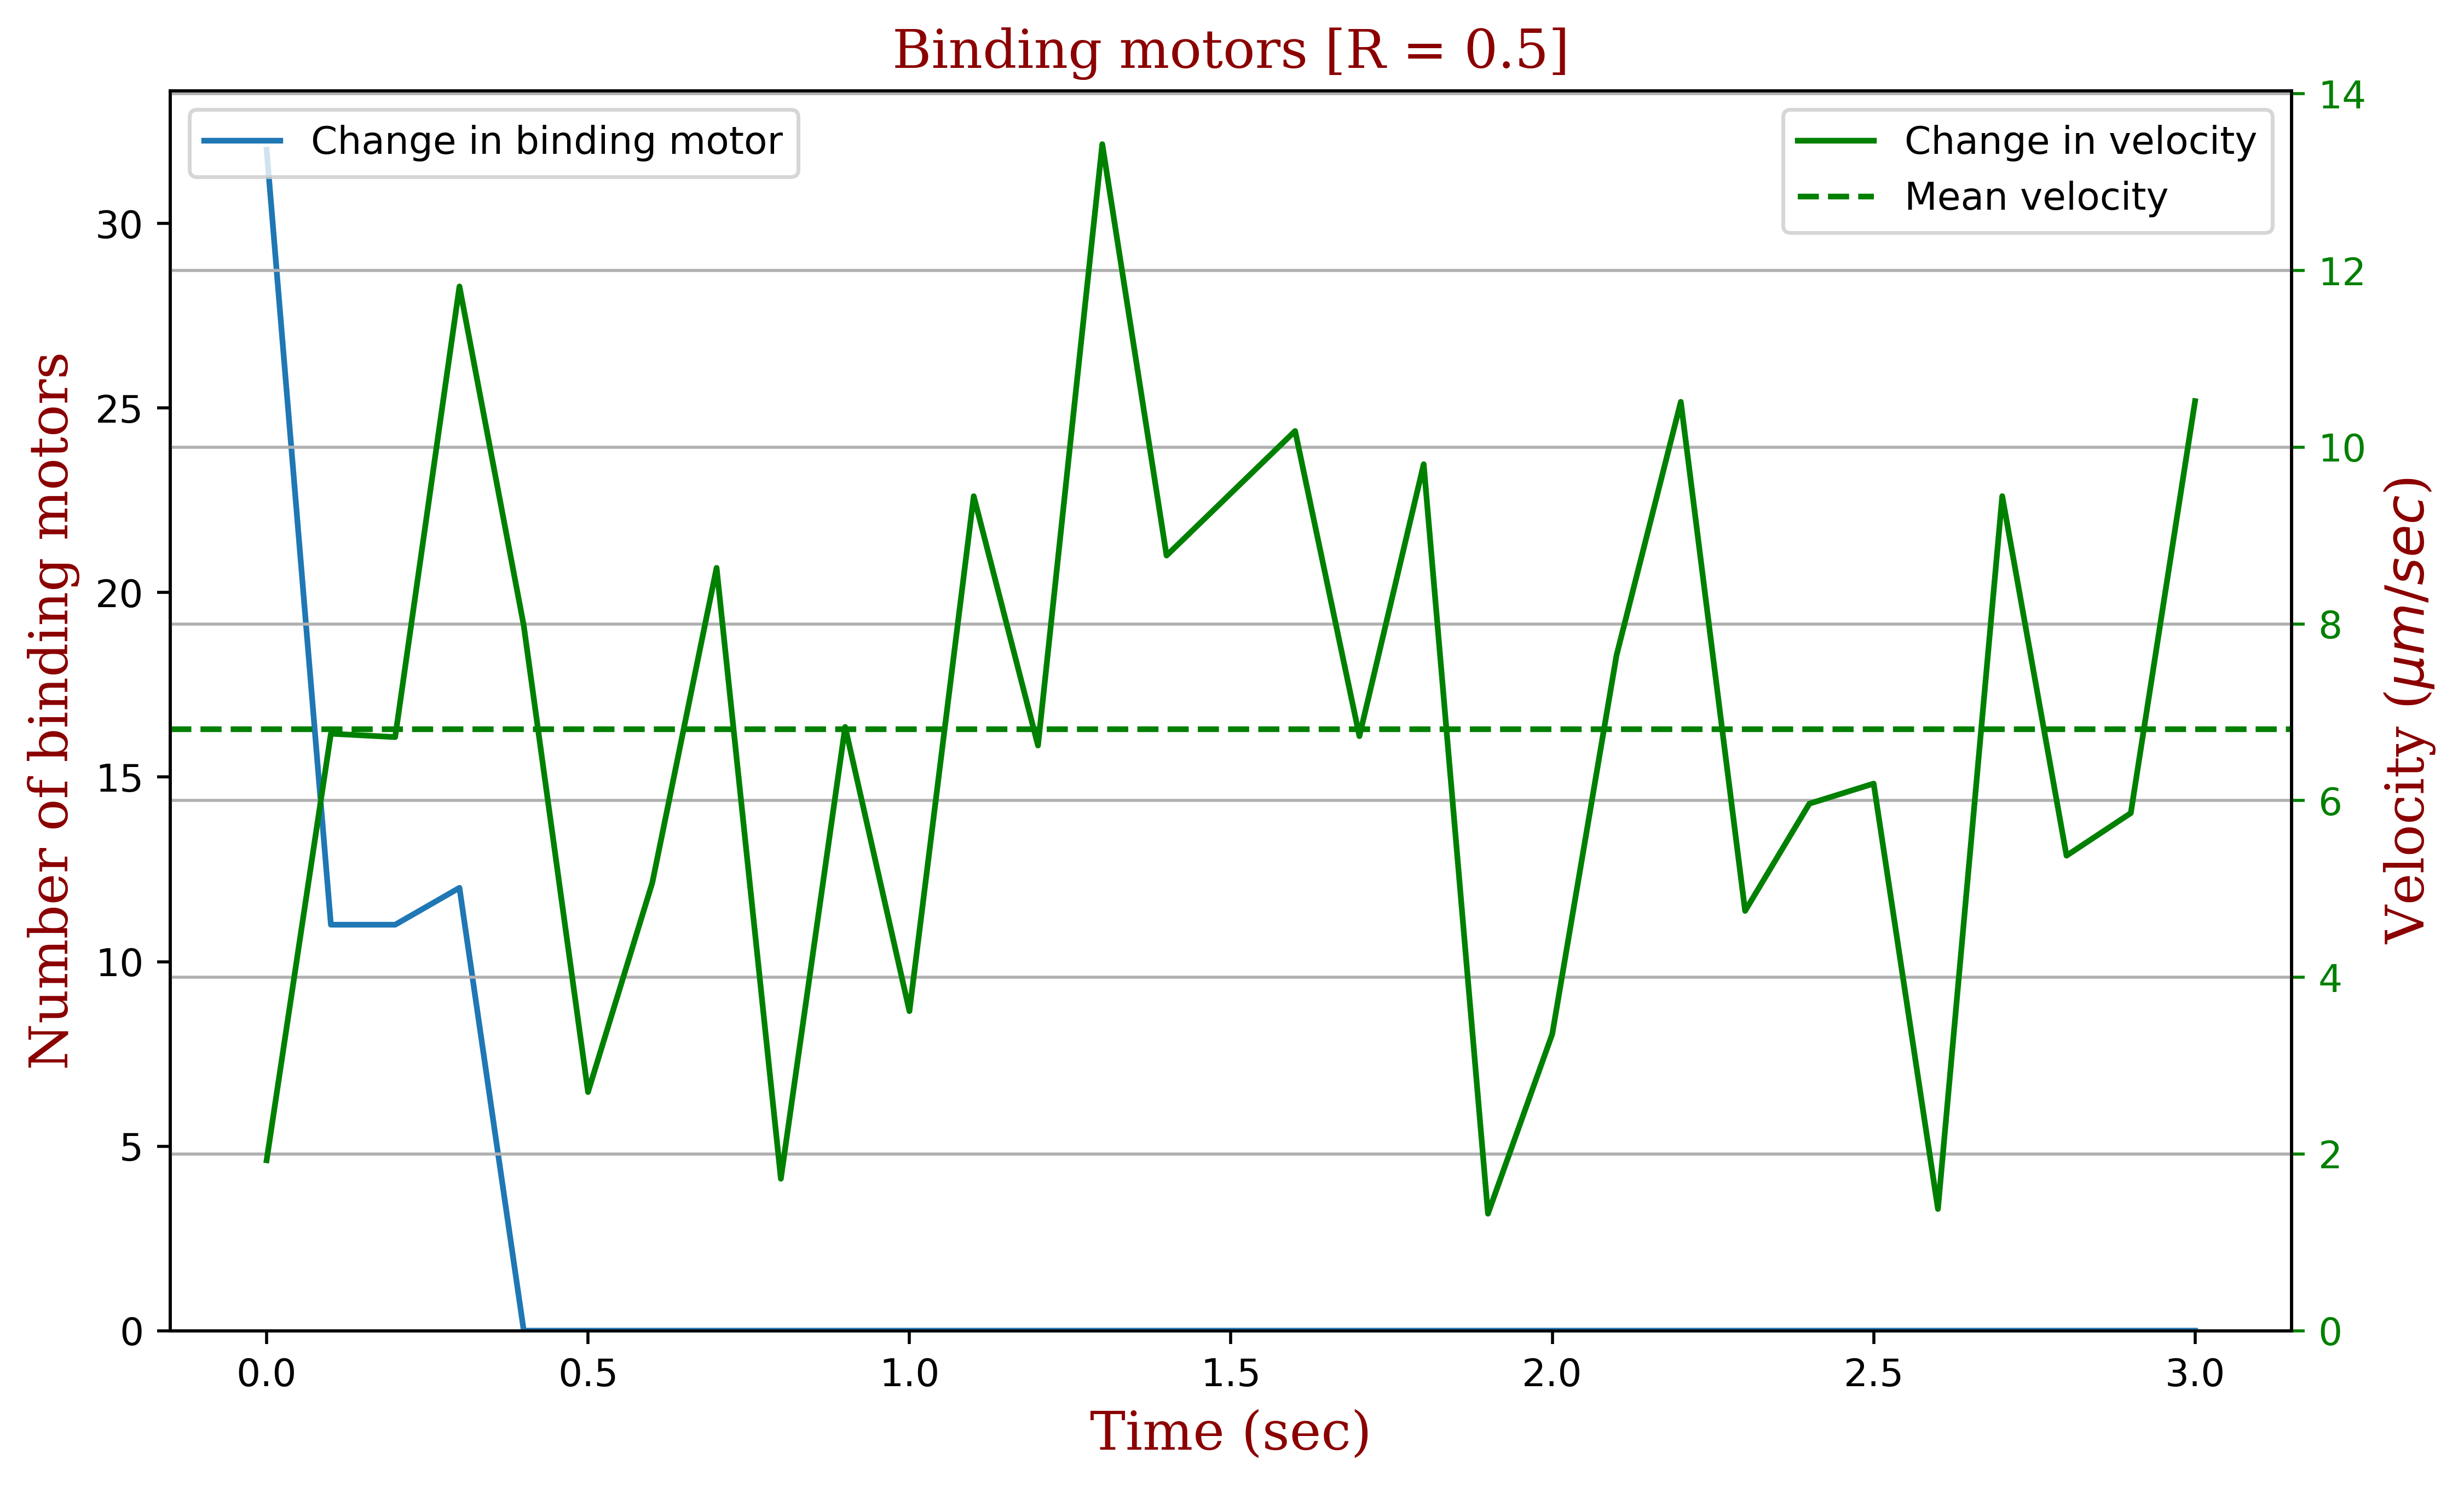

Mean velocity, time[0:0.3] =  6.805809288099232
bVSD: 4.038780523779666
    time  b_m        vel
0    0.0   32   1.928373
1    0.1   11   6.757008
2    0.2   11   6.718481
3    0.3   12  11.819376
4    0.4    0   7.981508
5    0.5    0   2.700555
6    0.6    0   5.070307
7    0.7    0   8.634120
8    0.8    0   1.719502
9    0.9    0   6.833755
10   1.0    0   3.616469
11   1.1    0   9.445194
12   1.2    0   6.622984
13   1.3    0  13.429919
14   1.4    0   8.773142
15   1.6    0  10.183313
16   1.7    0   6.729214
17   1.8    0   9.807282
18   1.9    0   1.323625
19   2.0    0   3.357096
20   2.1    0   7.644400
21   2.2    0  10.513340
22   2.3    0   4.750929
23   2.4    0   5.964936
24   2.5    0   6.192215
25   2.6    0   1.377046
26   2.7    0   9.445823
27   2.8    0   5.376212
28   2.9    0   5.858195
29   3.0    0  10.521625


In [7]:
Dx_tip = np.diff(bmd05['x']); Dy_tip = np.diff(bmd05['y'])
DD=np.sqrt((Dx_tip**2)+(Dy_tip**2))
v=DD/(10*dt); Av_vel = np.mean(v)
vSD=np.sum(((v-Av_vel)**2)/(np.size(v)-1)); vSD=np.sqrt(vSD)
time = np.around(np.linspace(0,3,30,endpoint=True), decimals=1)

v1 = v.reshape(30,1)
v1 = pd.DataFrame(v1)
tym = pd.DataFrame(time)
bm05_ = bm05.reset_index(drop=True)
nbm05 = pd.concat([tym, bm05_, v1], axis=1)
nbm05.columns=['time','b_m','vel']
#print(nbm05)
nbm05 = nbm05[0:4]
nbm05 = nbm05.iloc[:,2]

nv = nbm05; nAv_vel = nbm05.mean()
nvSD=np.sum(((nv-nAv_vel)**2)/(np.size(nv)-1)); nvSD=np.sqrt(nvSD)

fig, ax1 = plt.subplots(figsize=(10,6), dpi=500)
ax1.set_xlabel('Time (sec)', fontdict=font)
ax1.set_ylabel('Number of binding motors', fontdict=font)
ax1.plot(time,bm05, label='Change in binding motor')
ax1.legend(loc='upper left')
ax1.set_ylim(bottom=0)

ax2 = ax1.twinx()
ax2.set_xlabel('Time (sec)', fontdict=font)
ax2.set_ylabel('Velocity ($\mu m/sec$)', fontdict=font)
ax2.plot(time,v, 'g', label='Change in velocity')
ax2.axhline(nbm05.mean(), linestyle='--', color='g', label='Mean velocity')
ax2.legend(loc='upper right')
ax2.tick_params('y', colors='g')
ax2.set_ylim(bottom=0)

plt.title('Binding motors [R = 0.5]', fontdict=font)
plt.grid()



plt.show()
fig.savefig('actin_binding_grinding_r0.5.svg',bbox_inches='tight', format='svg')

#print(colored('Ave_vel:', 'yellow', attrs=['reverse', 'blink']), \
#      colored(Av_vel, 'yellow', attrs=['reverse', 'blink']))
#print(colored('VSD:', 'yellow', attrs=['reverse', 'blink']), \
#      colored(vSD, 'yellow', attrs=['reverse', 'blink']))
print(colored('Mean velocity, time[0:0.3] = ', 'yellow', attrs=['reverse', 'blink']), \
      colored(nbm05.mean(), 'yellow', attrs=['reverse', 'blink']))
print(colored('bVSD:', 'yellow', attrs=['reverse', 'blink']), \
      colored(nvSD, 'yellow', attrs=['reverse', 'blink']))

nbm05 = pd.concat([tym, bm05_, v1], axis=1)
nbm05.columns=['time','b_m','vel']
print(nbm05)

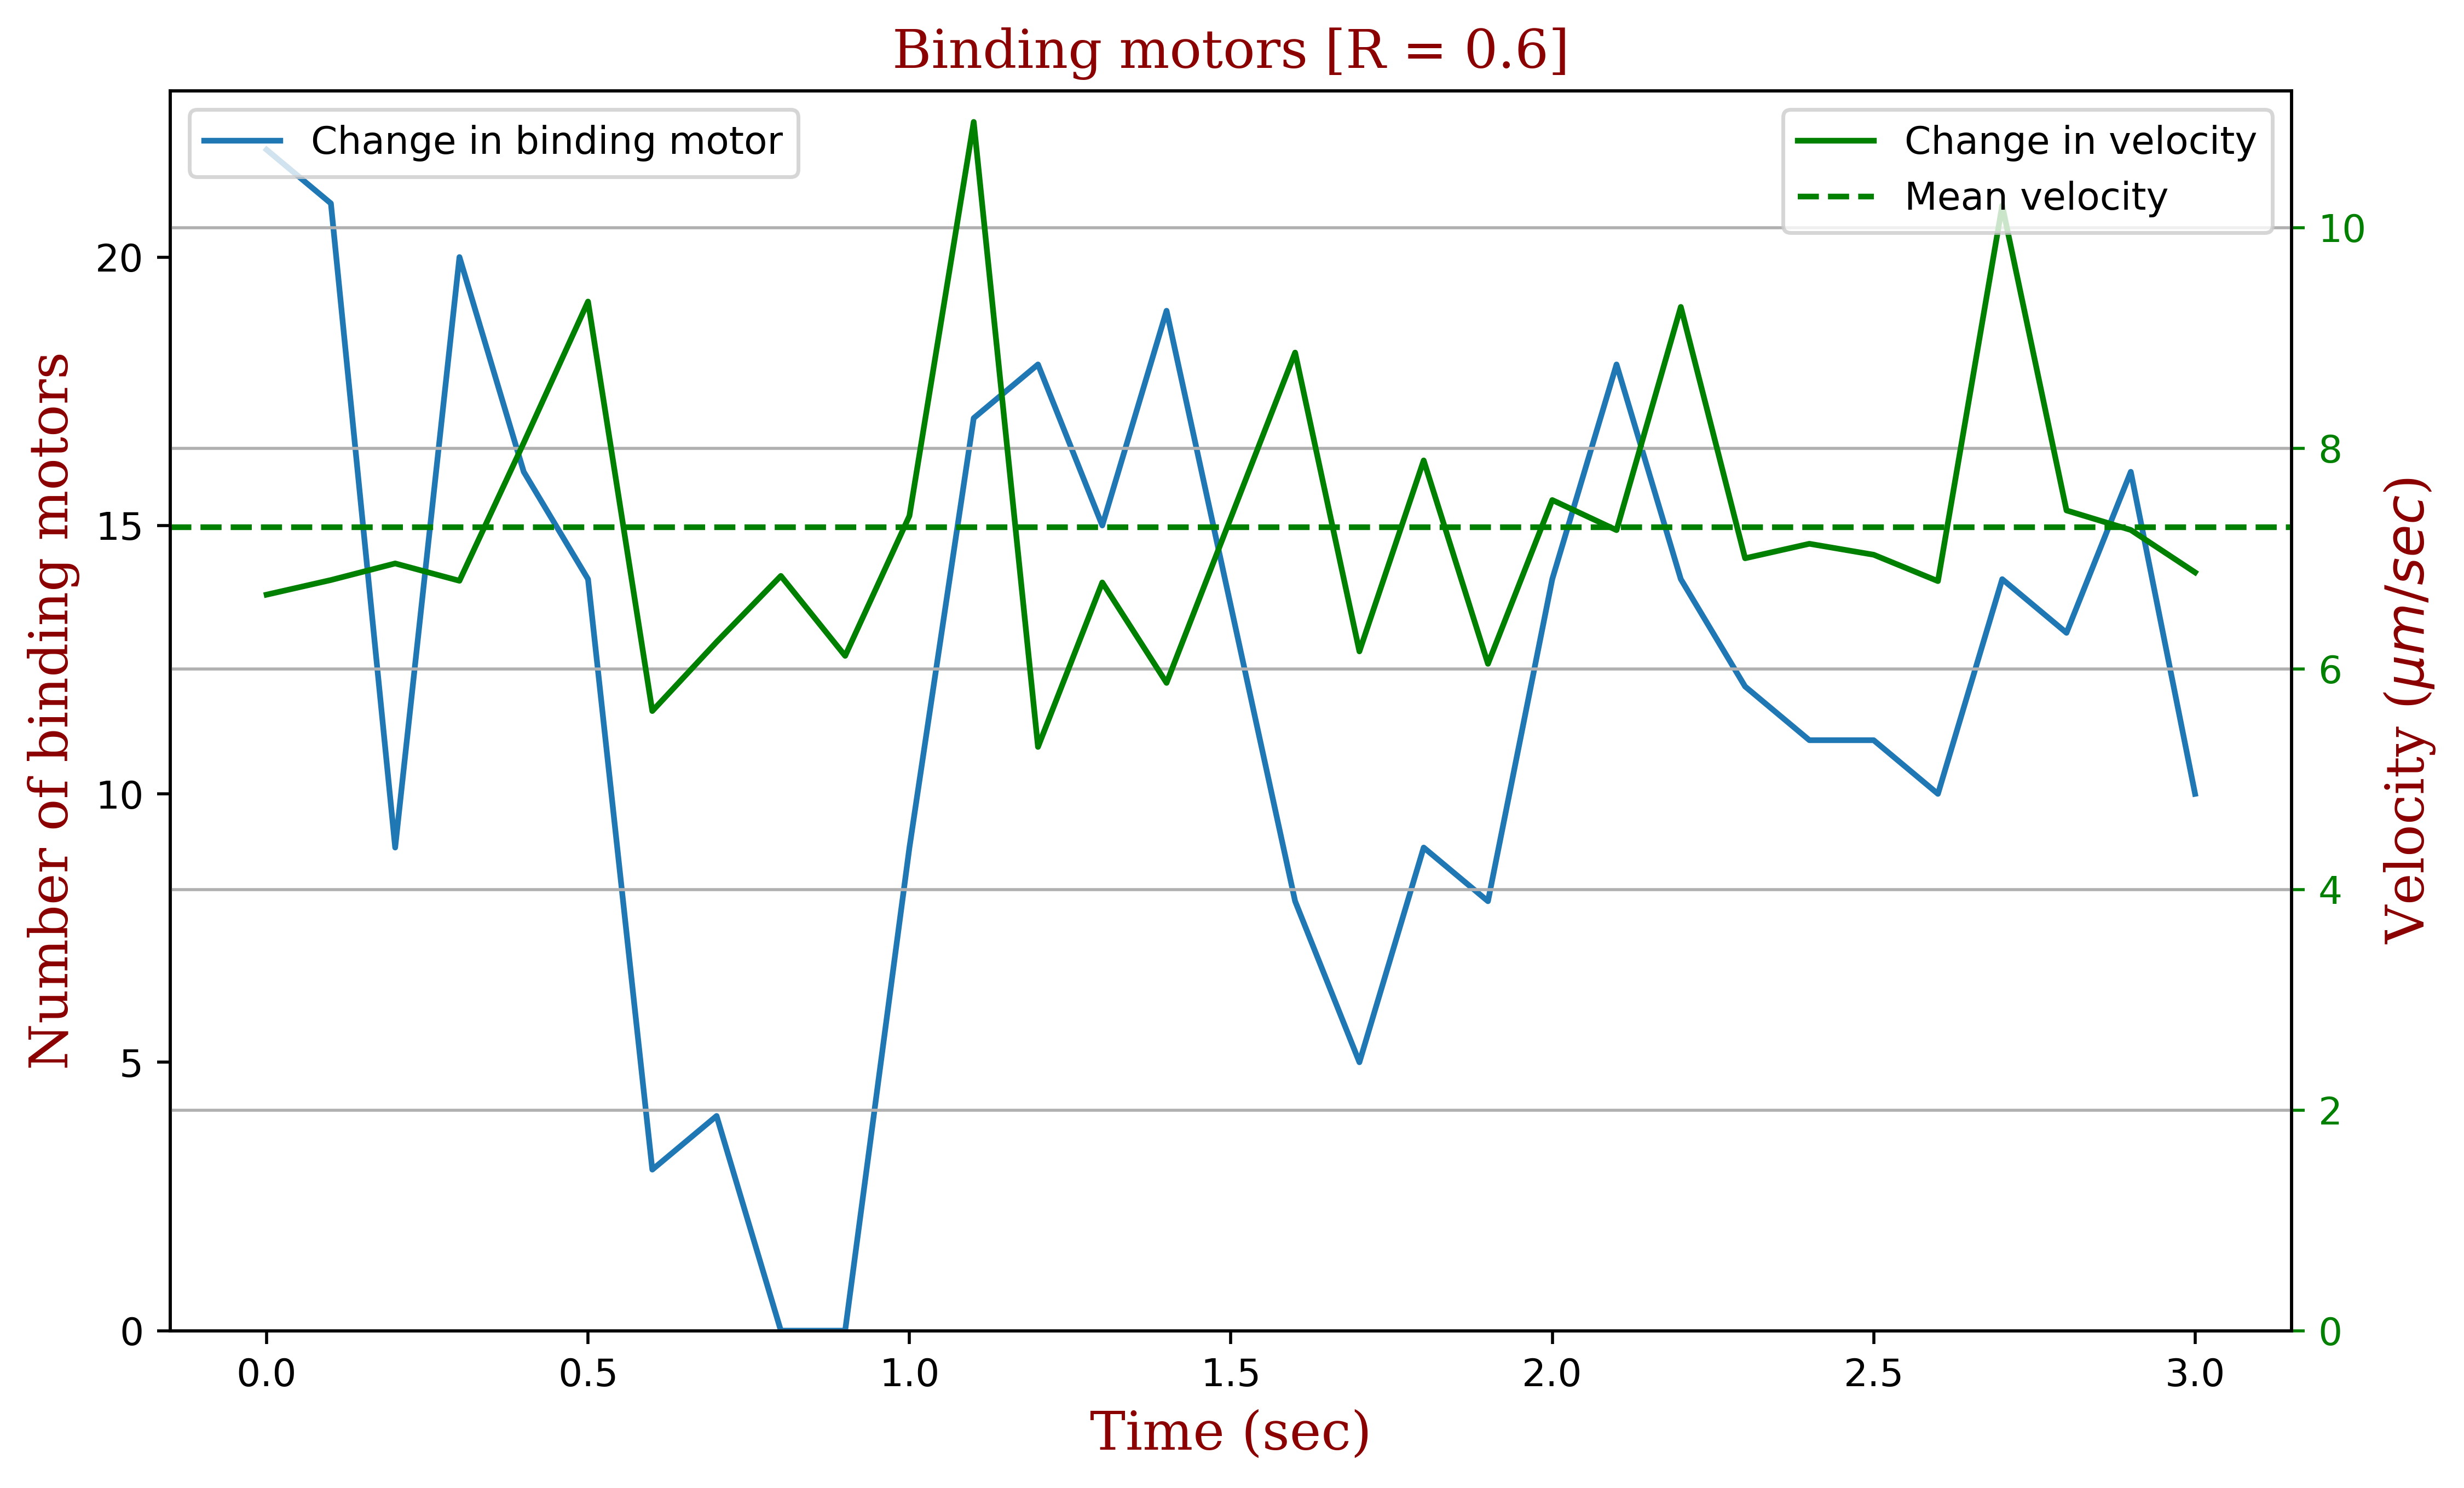

Ave_vel: 7.282007675194181
VSD: 1.3086360626563276
    time  b_m        vel
0    0.0   22   6.671475
1    0.1   21   6.804127
2    0.2    9   6.954521
3    0.3   20   6.797462
4    0.4   16   8.048206
5    0.5   14   9.328523
6    0.6    3   5.616730
7    0.7    4   6.242680
8    0.8    0   6.841550
9    0.9    0   6.116822
10   1.0    9   7.386076
11   1.1   17  10.956830
12   1.2   18   5.291472
13   1.3   15   6.782006
14   1.4   19   5.871845
15   1.6    8   8.866041
16   1.7    5   6.157360
17   1.8    9   7.888488
18   1.9    8   6.044579
19   2.0   14   7.529460
20   2.1   18   7.256533
21   2.2   14   9.279857
22   2.3   12   7.001489
23   2.4   11   7.132840
24   2.5   11   7.033493
25   2.6   10   6.794492
26   2.7   14  10.198577
27   2.8   13   7.435137
28   2.9   16   7.258005
29   3.0   10   6.873555


In [8]:
Dx_tip = np.diff(bmd06['x']); Dy_tip = np.diff(bmd06['y'])
DD=np.sqrt((Dx_tip**2)+(Dy_tip**2))
v=DD/(10*dt); Av_vel = np.mean(v)
vSD=np.sum(((v-Av_vel)**2)/(np.size(v)-1)); vSD=np.sqrt(vSD)
time = np.around(np.linspace(0,3,30,endpoint=True), decimals=1)

fig, ax1 = plt.subplots(figsize=(10,6), dpi=500)
ax1.set_xlabel('Time (sec)', fontdict=font)
ax1.set_ylabel('Number of binding motors', fontdict=font)
ax1.plot(time,bm06, label='Change in binding motor')
ax1.legend(loc='upper left')
ax1.set_ylim(bottom=0)

ax2 = ax1.twinx()
ax2.set_xlabel('Time (sec)', fontdict=font)
ax2.set_ylabel('Velocity ($\mu m/sec$)', fontdict=font)
ax2.plot(time,v, 'g', label='Change in velocity')
ax2.axhline(np.mean(v), linestyle='--', color='g', label='Mean velocity')
ax2.legend(loc='upper right')
ax2.tick_params('y', colors='g')
ax2.set_ylim(bottom=0)

plt.title('Binding motors [R = 0.6]', fontdict=font)
plt.grid()

v1 = v.reshape(30,1)
v1 = pd.DataFrame(v1)
tym = pd.DataFrame(time)
bm06_ = bm06.reset_index(drop=True)
nbm06 = pd.concat([tym, bm06_, v1], axis=1)
nbm06.columns=['time','b_m','vel']
#print(nbm06)

plt.show()
fig.savefig('actin_binding_grinding_r0.6.svg',bbox_inches='tight', format='svg')

print(colored('Ave_vel:', 'yellow', attrs=['reverse', 'blink']), \
      colored(Av_vel, 'yellow', attrs=['reverse', 'blink']))
print(colored('VSD:', 'yellow', attrs=['reverse', 'blink']), \
      colored(vSD, 'yellow', attrs=['reverse', 'blink']))

nbm06 = pd.concat([tym, bm06_, v1], axis=1)
nbm06.columns=['time','b_m','vel']
print(nbm06)

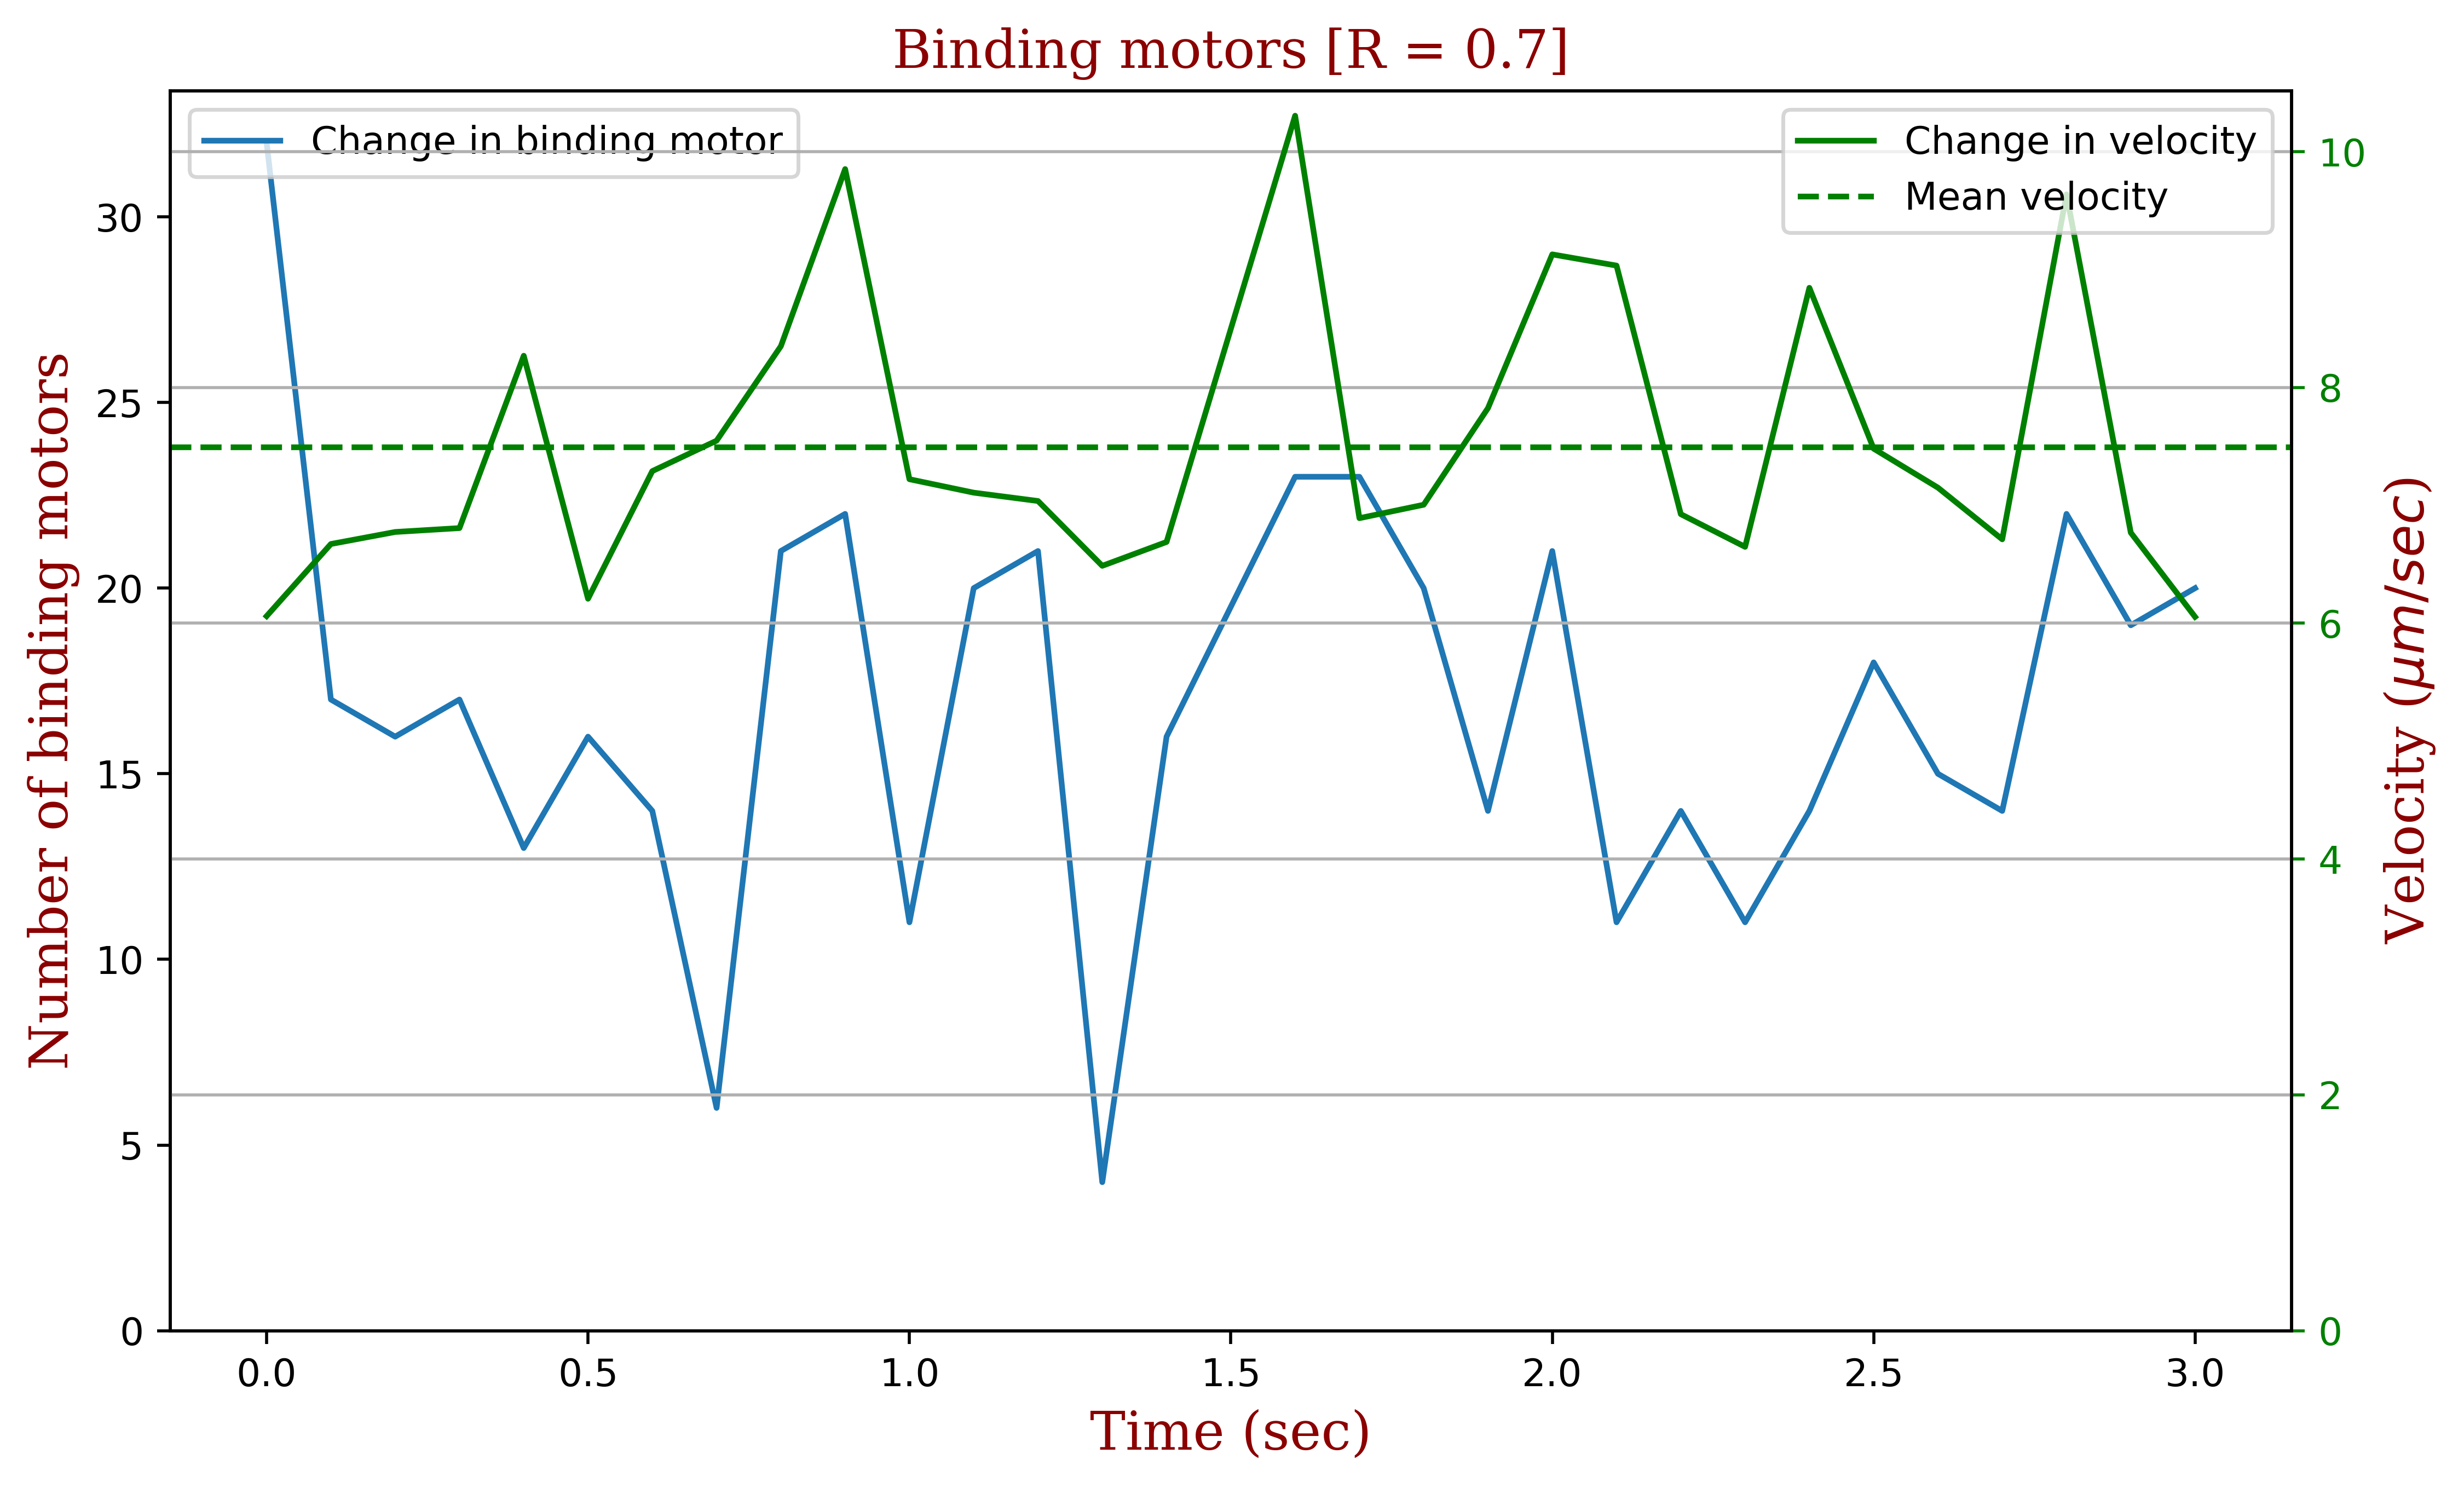

Ave_vel: 7.492939675514557
VSD: 1.1574367344368706
    time  b_m        vel
0    0.0   32   6.060507
1    0.1   17   6.672295
2    0.2   16   6.774298
3    0.3   17   6.807262
4    0.4   13   8.269058
5    0.5   16   6.208064
6    0.6   14   7.290542
7    0.7    6   7.548734
8    0.8   21   8.350132
9    0.9   22   9.852319
10   1.0   11   7.221850
11   1.1   20   7.107752
12   1.2   21   7.037036
13   1.3    4   6.487188
14   1.4   16   6.689663
15   1.6   23  10.304886
16   1.7   23   6.891408
17   1.8   20   7.005254
18   1.9   14   7.824934
19   2.0   21   9.128825
20   2.1   11   9.033730
21   2.2   14   6.925317
22   2.3   11   6.648315
23   2.4   14   8.845344
24   2.5   18   7.480932
25   2.6   15   7.150117
26   2.7   14   6.711999
27   2.8   22   9.637538
28   2.9   19   6.768619
29   3.0   20   6.054273


In [9]:
Dx_tip = np.diff(bmd07['x']); Dy_tip = np.diff(bmd07['y'])
DD=np.sqrt((Dx_tip**2)+(Dy_tip**2))
v=DD/(10*dt); Av_vel = np.mean(v)
vSD=np.sum(((v-Av_vel)**2)/(np.size(v)-1)); vSD=np.sqrt(vSD)
time = np.around(np.linspace(0,3,30,endpoint=True), decimals=1)

fig, ax1 = plt.subplots(figsize=(10,6), dpi=500)
ax1.set_xlabel('Time (sec)', fontdict=font)
ax1.set_ylabel('Number of binding motors', fontdict=font)
ax1.plot(time,bm07, label='Change in binding motor')
ax1.legend(loc='upper left')
ax1.set_ylim(bottom=0)

ax2 = ax1.twinx()
ax2.set_xlabel('Time (sec)', fontdict=font)
ax2.set_ylabel('Velocity ($\mu m/sec$)', fontdict=font)
ax2.plot(time,v, 'g', label='Change in velocity')
ax2.axhline(np.mean(v), linestyle='--', color='g', label='Mean velocity')
ax2.legend(loc='upper right')
ax2.tick_params('y', colors='g')
ax2.set_ylim(bottom=0)

plt.title('Binding motors [R = 0.7]', fontdict=font)
plt.grid()

v1 = v.reshape(30,1)
v1 = pd.DataFrame(v1)
tym = pd.DataFrame(time)
bm07_ = bm07.reset_index(drop=True)
nbm07 = pd.concat([tym, bm07_, v1], axis=1)
nbm07.columns=['time','b_m','vel']
#print(nbm07)

plt.show()
fig.savefig('actin_binding_grinding_r0.7.svg',bbox_inches='tight', format='svg')

print(colored('Ave_vel:', 'yellow', attrs=['reverse', 'blink']), \
      colored(Av_vel, 'yellow', attrs=['reverse', 'blink']))
print(colored('VSD:', 'yellow', attrs=['reverse', 'blink']), \
      colored(vSD, 'yellow', attrs=['reverse', 'blink']))

nbm07 = pd.concat([tym, bm07_, v1], axis=1)
nbm07.columns=['time','b_m','vel']
print(nbm07)

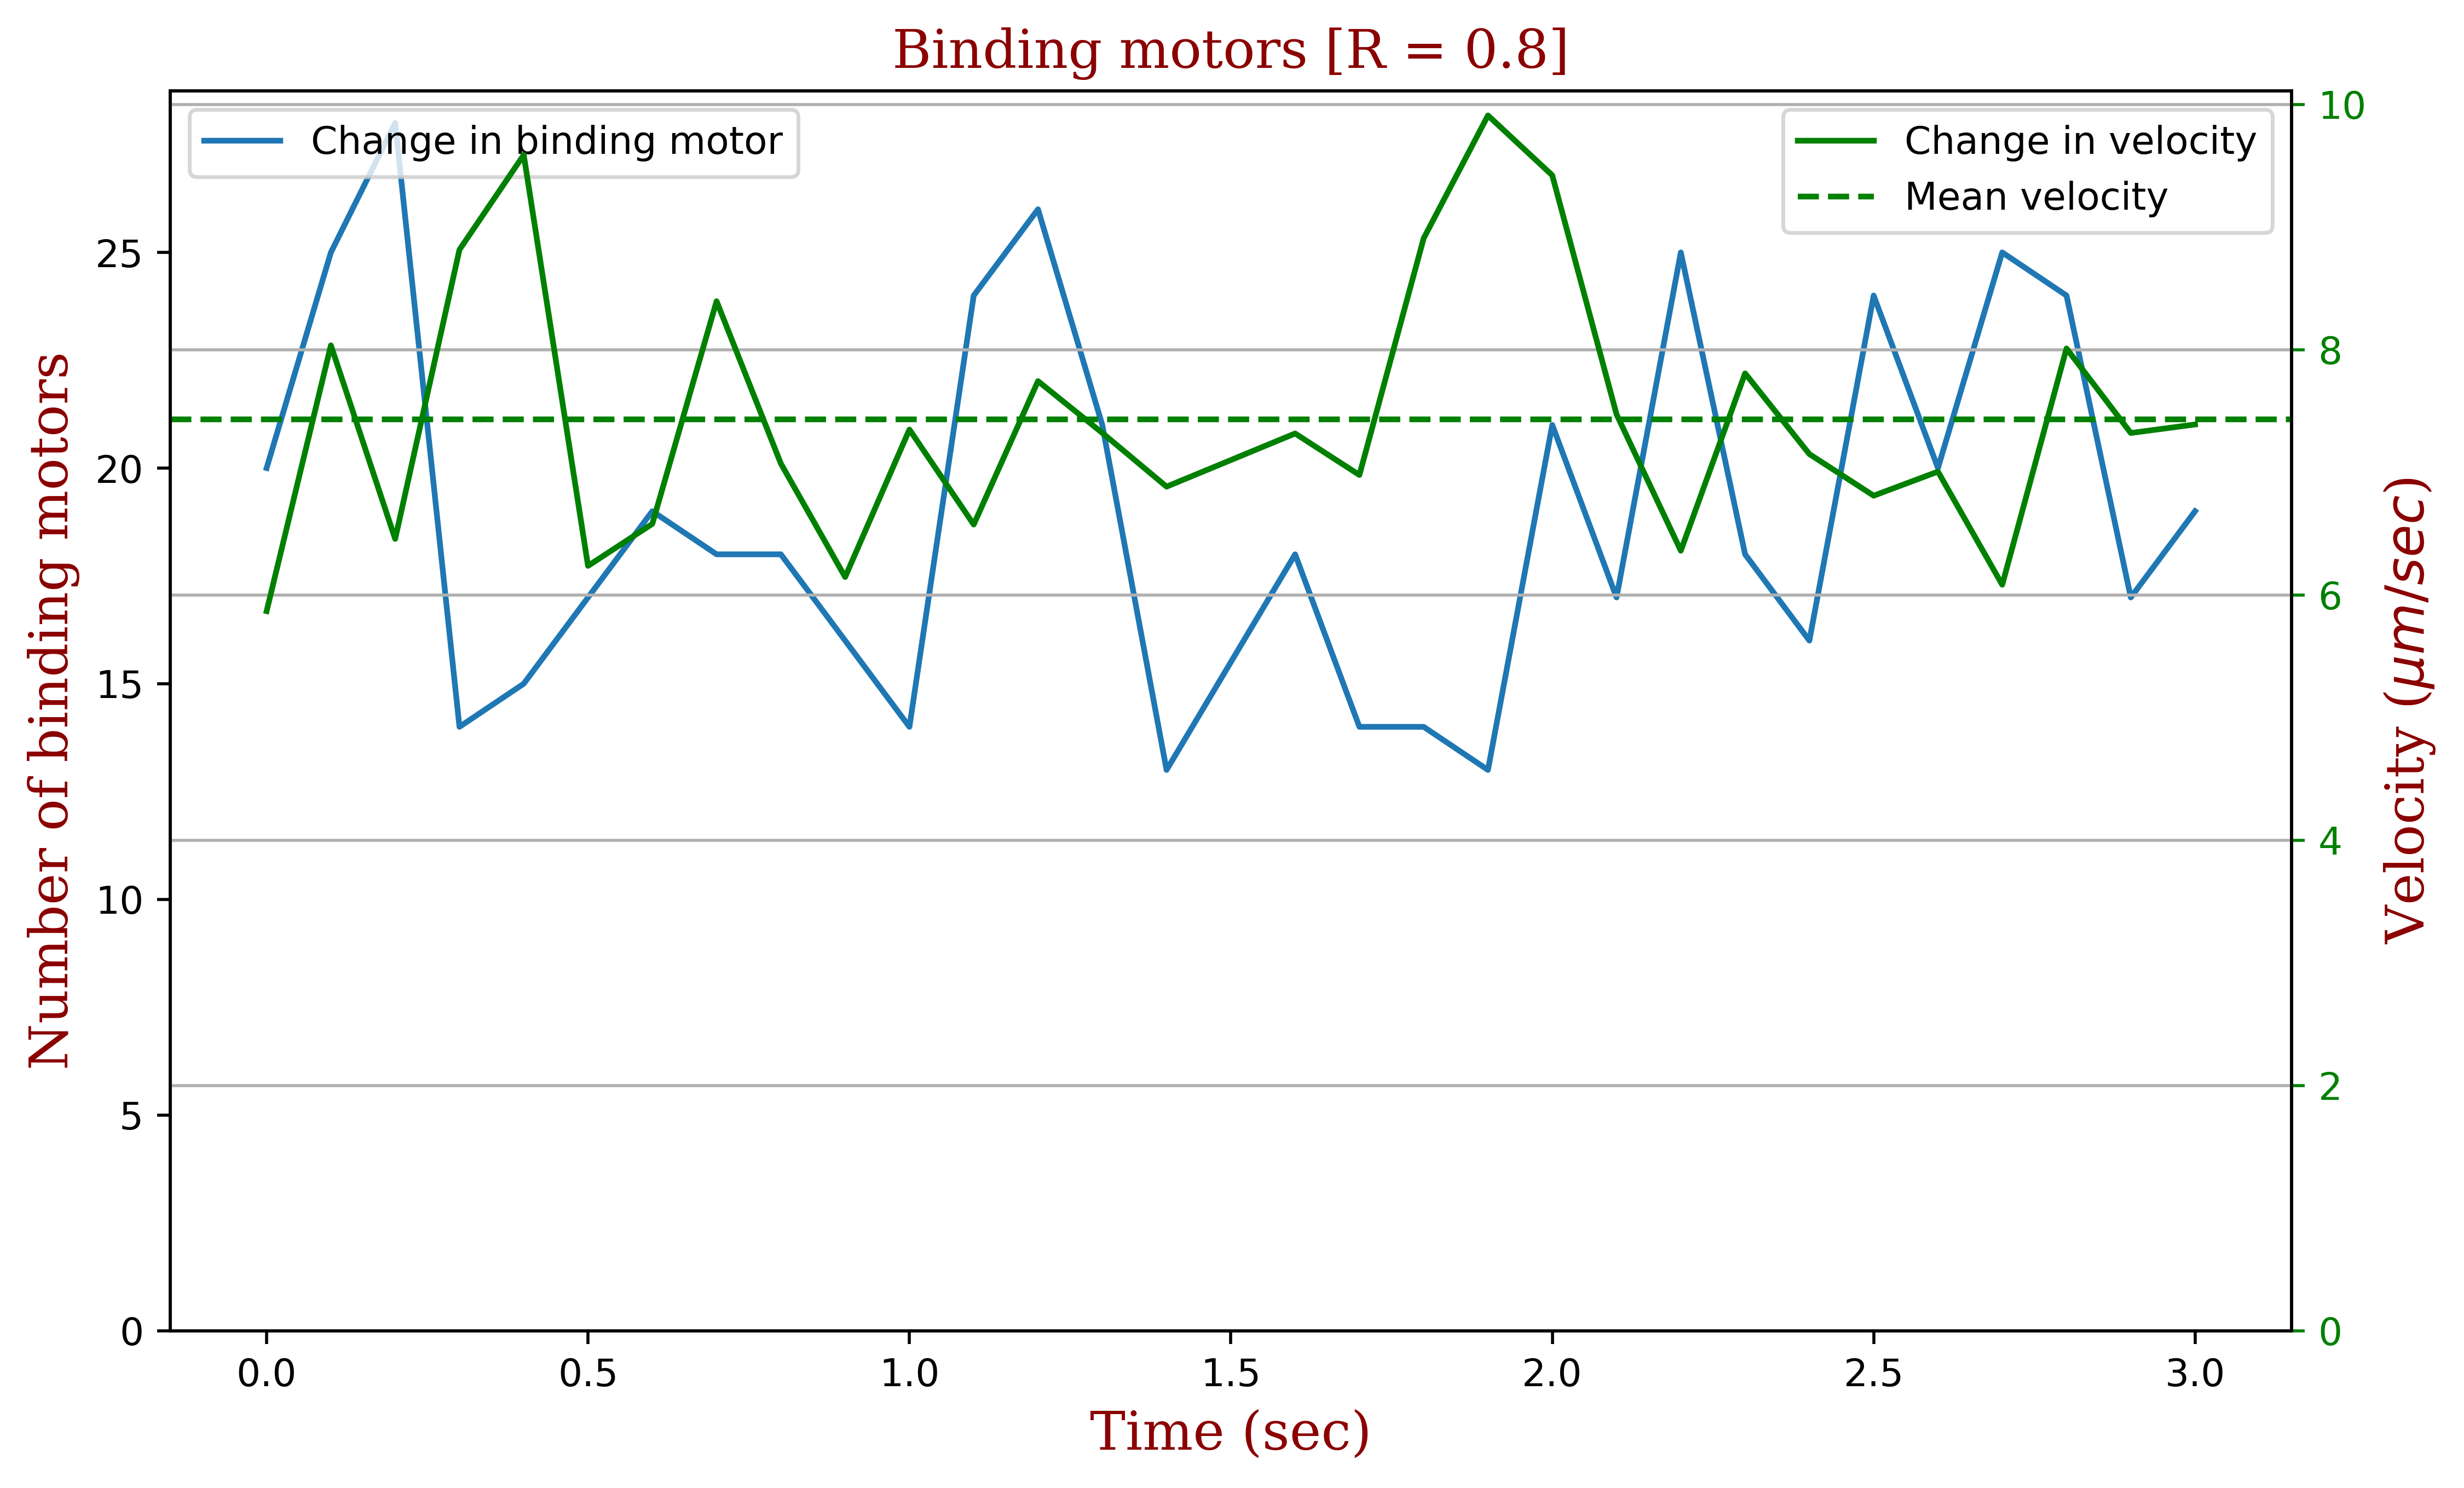

Ave_vel: 7.43326182559258
VSD: 1.0660006615950277
    time  b_m       vel
0    0.0   20  5.867503
1    0.1   25  8.035230
2    0.2   28  6.456399
3    0.3   14  8.815181
4    0.4   15  9.587852
5    0.5   17  6.236847
6    0.6   19  6.579205
7    0.7   18  8.395017
8    0.8   18  7.070739
9    0.9   16  6.145645
10   1.0   14  7.348533
11   1.1   24  6.573665
12   1.2   26  7.743231
13   1.3   21  7.321075
14   1.4   13  6.882814
15   1.6   18  7.316362
16   1.7   14  6.977717
17   1.8   14  8.908350
18   1.9   13  9.909813
19   2.0   21  9.421854
20   2.1   17  7.472667
21   2.2   25  6.360379
22   2.3   18  7.806599
23   2.4   16  7.148355
24   2.5   24  6.809080
25   2.6   20  7.005325
26   2.7   25  6.082757
27   2.8   24  8.009433
28   2.9   17  7.320394
29   3.0   19  7.389833


In [10]:
Dx_tip = np.diff(bmd08['x']); Dy_tip = np.diff(bmd08['y'])
DD=np.sqrt((Dx_tip**2)+(Dy_tip**2))
v=DD/(10*dt); Av_vel = np.mean(v)
vSD=np.sum(((v-Av_vel)**2)/(np.size(v)-1)); vSD=np.sqrt(vSD)
time = np.around(np.linspace(0,3,30,endpoint=True), decimals=1)

fig, ax1 = plt.subplots(figsize=(10,6), dpi=500)
ax1.set_xlabel('Time (sec)', fontdict=font)
ax1.set_ylabel('Number of binding motors', fontdict=font)
ax1.plot(time,bm08, label='Change in binding motor')
ax1.legend(loc='upper left')
ax1.set_ylim(bottom=0)

ax2 = ax1.twinx()
ax2.set_xlabel('Time (sec)', fontdict=font)
ax2.set_ylabel('Velocity ($\mu m/sec$)', fontdict=font)
ax2.plot(time,v, 'g', label='Change in velocity')
ax2.axhline(np.mean(v), linestyle='--', color='g', label='Mean velocity')
ax2.legend(loc='upper right')
ax2.tick_params('y', colors='g')
ax2.set_ylim(bottom=0)

plt.title('Binding motors [R = 0.8]', fontdict=font)
plt.grid()

v1 = v.reshape(30,1)
v1 = pd.DataFrame(v1)
tym = pd.DataFrame(time)
bm08_ = bm08.reset_index(drop=True)
nbm08 = pd.concat([tym, bm08_, v1], axis=1)
nbm08.columns=['time','b_m','vel']
#print(nbm08)

plt.show()
fig.savefig('actin_binding_grinding_r0.8.svg',bbox_inches='tight', format='svg')

print(colored('Ave_vel:', 'yellow', attrs=['reverse', 'blink']), \
      colored(Av_vel, 'yellow', attrs=['reverse', 'blink']))
print(colored('VSD:', 'yellow', attrs=['reverse', 'blink']), \
      colored(vSD, 'yellow', attrs=['reverse', 'blink']))

nbm08 = pd.concat([tym, bm08_, v1], axis=1)
nbm08.columns=['time','b_m','vel']
print(nbm08)

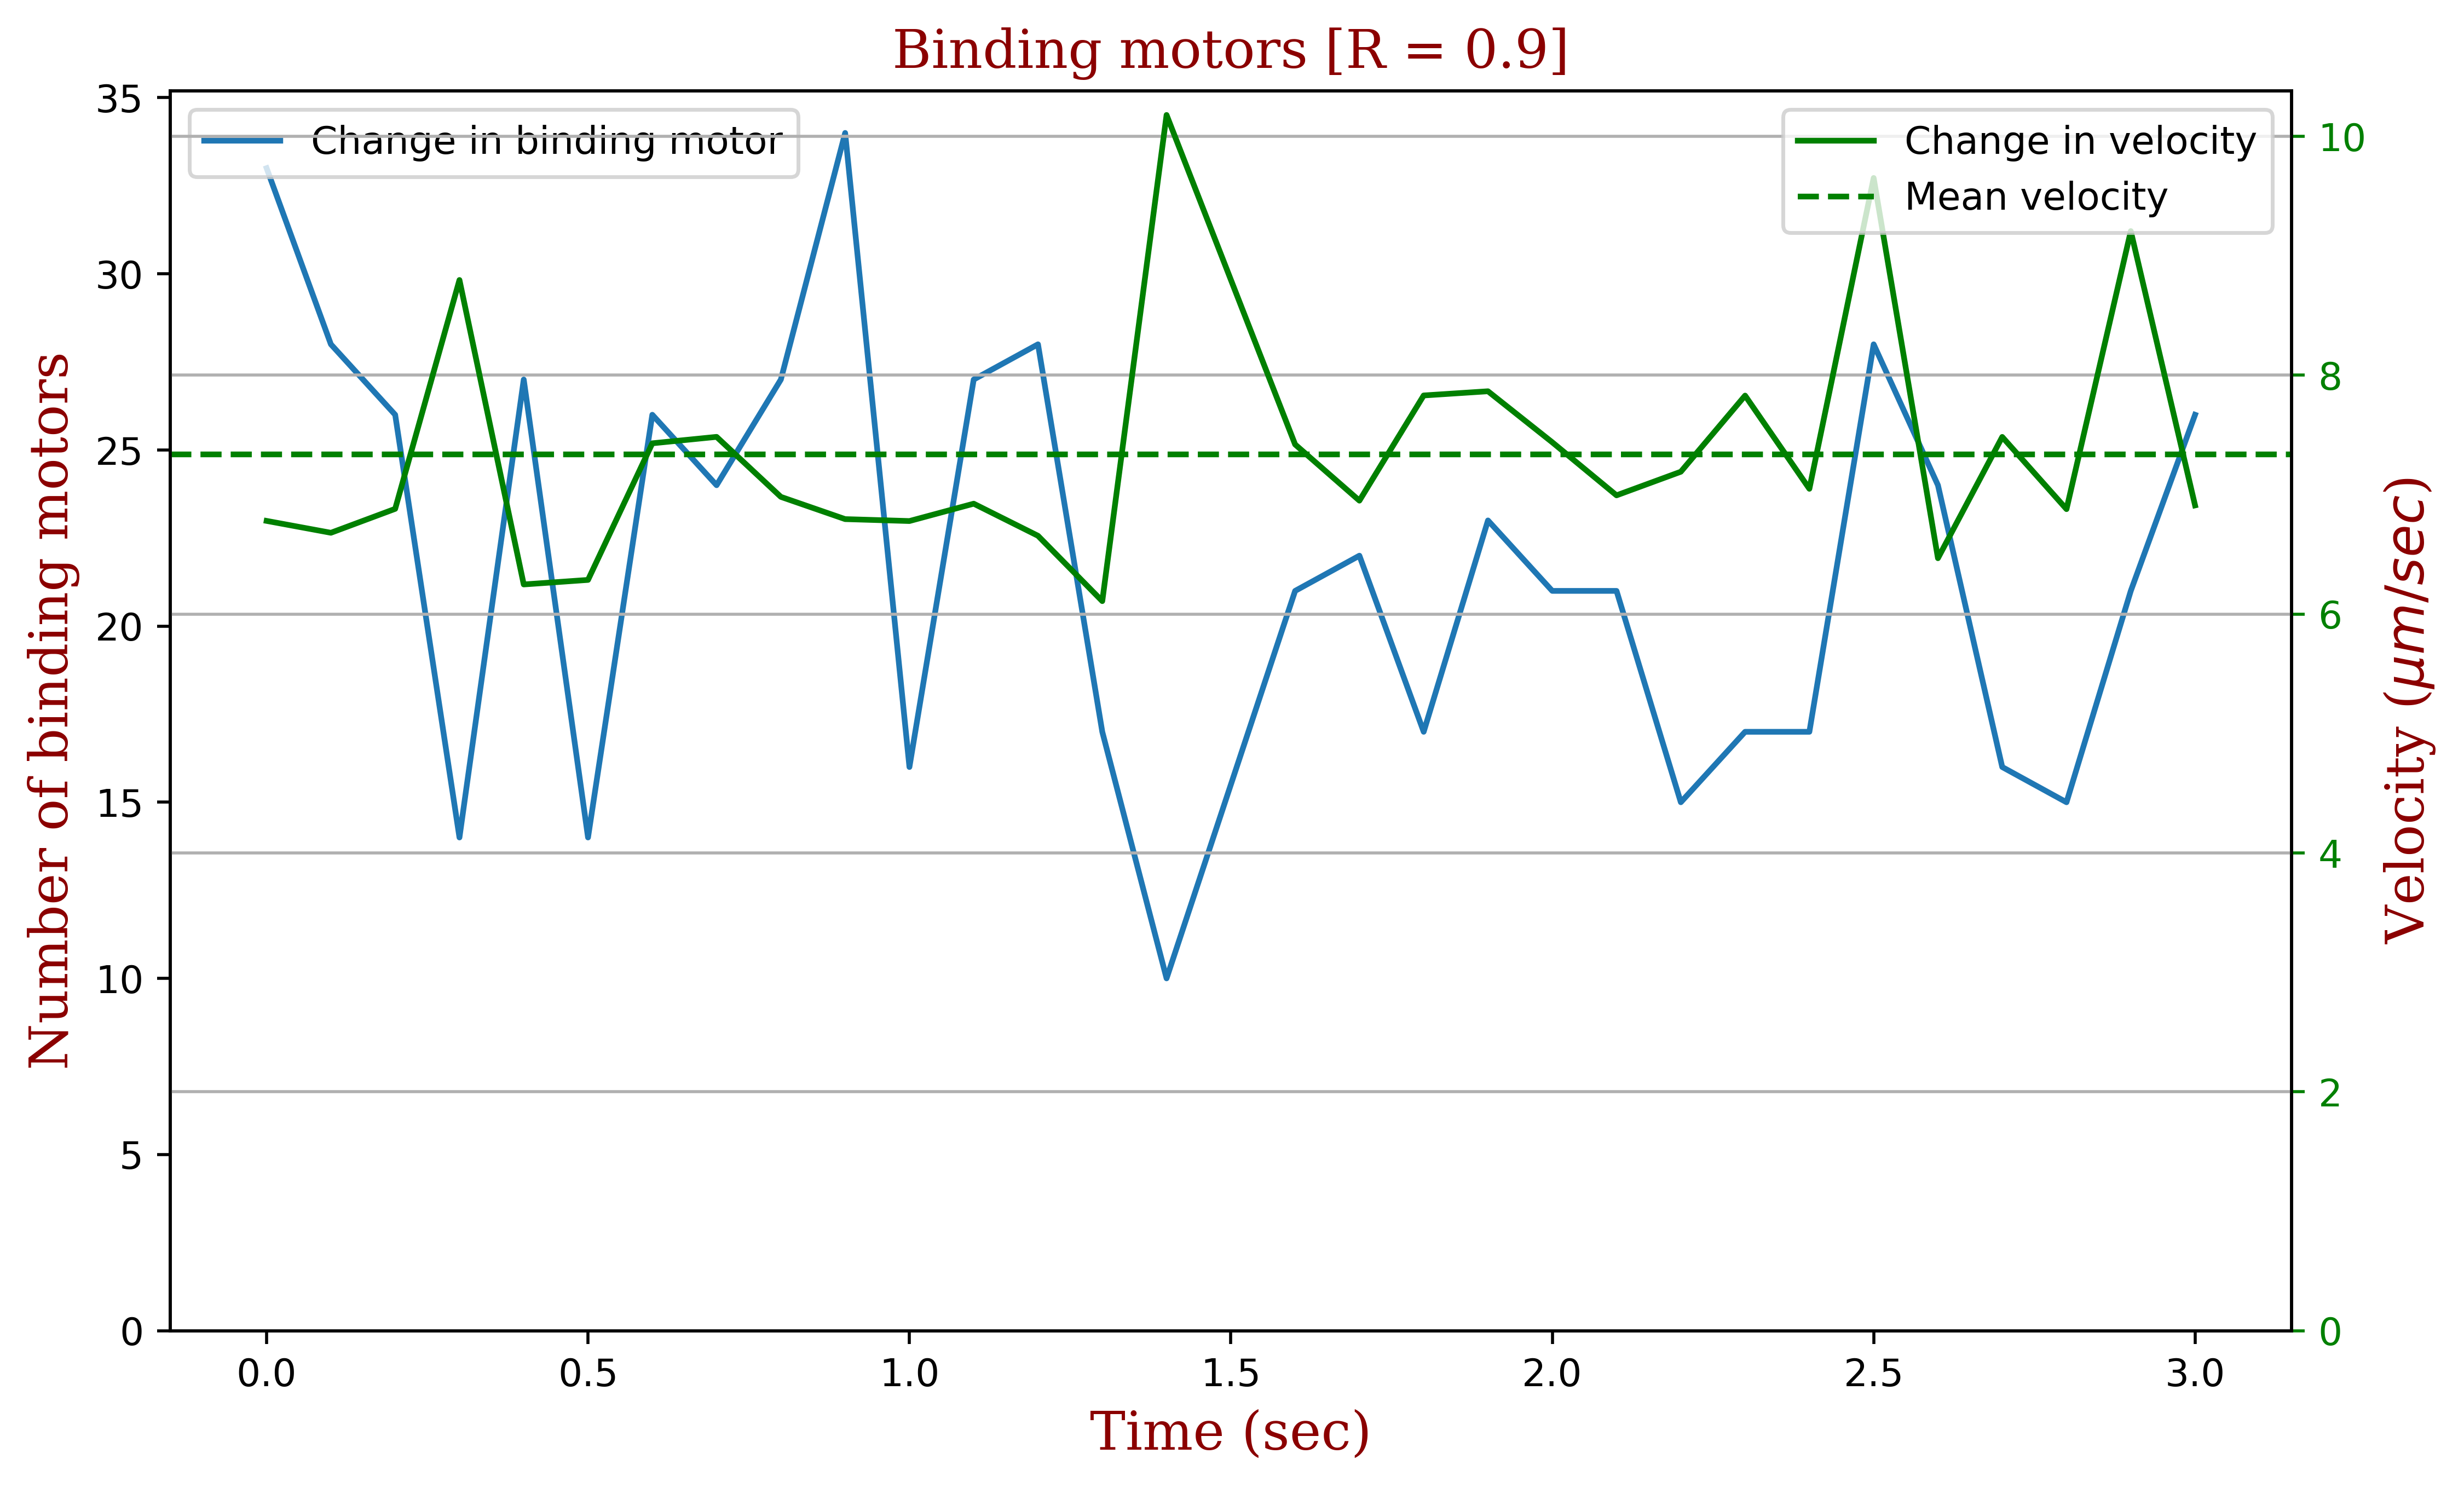

Ave_vel: 7.339058215606861
VSD: 0.9742770132644262
    time  b_m        vel
0    0.0   33   6.780059
1    0.1   28   6.680578
2    0.2   26   6.880970
3    0.3   14   8.797046
4    0.4   27   6.248038
5    0.5   14   6.285935
6    0.6   26   7.429762
7    0.7   24   7.483599
8    0.8   27   6.981273
9    0.9   34   6.794931
10   1.0   16   6.778867
11   1.1   27   6.924144
12   1.2   28   6.655315
13   1.3   17   6.108328
14   1.4   10  10.178770
15   1.6   21   7.420050
16   1.7   22   6.949657
17   1.8   17   7.830324
18   1.9   23   7.865466
19   2.0   21   7.438318
20   2.1   21   6.994044
21   2.2   15   7.191670
22   2.3   17   7.829118
23   2.4   17   7.048823
24   2.5   28   9.651166
25   2.6   24   6.467552
26   2.7   16   7.483098
27   2.8   15   6.878570
28   2.9   21   9.206380
29   3.0   26   6.909896


In [11]:
Dx_tip = np.diff(bmd09['x']); Dy_tip = np.diff(bmd09['y'])
DD=np.sqrt((Dx_tip**2)+(Dy_tip**2))
v=DD/(10*dt); Av_vel = np.mean(v)
vSD=np.sum(((v-Av_vel)**2)/(np.size(v)-1)); vSD=np.sqrt(vSD)
time = np.around(np.linspace(0,3,30,endpoint=True), decimals=1)

fig, ax1 = plt.subplots(figsize=(10,6), dpi=500)
ax1.set_xlabel('Time (sec)', fontdict=font)
ax1.set_ylabel('Number of binding motors', fontdict=font)
ax1.plot(time,bm09, label='Change in binding motor')
ax1.legend(loc='upper left')
ax1.set_ylim(bottom=0)

ax2 = ax1.twinx()
ax2.set_xlabel('Time (sec)', fontdict=font)
ax2.set_ylabel('Velocity ($\mu m/sec$)', fontdict=font)
ax2.plot(time,v, 'g', label='Change in velocity')
ax2.axhline(np.mean(v), linestyle='--', color='g', label='Mean velocity')
ax2.legend(loc='upper right')
ax2.tick_params('y', colors='g')
ax2.set_ylim(bottom=0)

plt.title('Binding motors [R = 0.9]', fontdict=font)
plt.grid()

v1 = v.reshape(30,1)
v1 = pd.DataFrame(v1)
tym = pd.DataFrame(time)
bm09_ = bm09.reset_index(drop=True)
nbm09 = pd.concat([tym, bm09_, v1], axis=1)
nbm09.columns=['time','b_m','vel']
#print(nbm09)

plt.show()
fig.savefig('actin_binding_grinding_r0.9.svg',bbox_inches='tight', format='svg')

print(colored('Ave_vel:', 'yellow', attrs=['reverse', 'blink']), \
      colored(Av_vel, 'yellow', attrs=['reverse', 'blink']))
print(colored('VSD:', 'yellow', attrs=['reverse', 'blink']), \
      colored(vSD, 'yellow', attrs=['reverse', 'blink']))

nbm09 = pd.concat([tym, bm09_, v1], axis=1)
nbm09.columns=['time','b_m','vel']
print(nbm09)

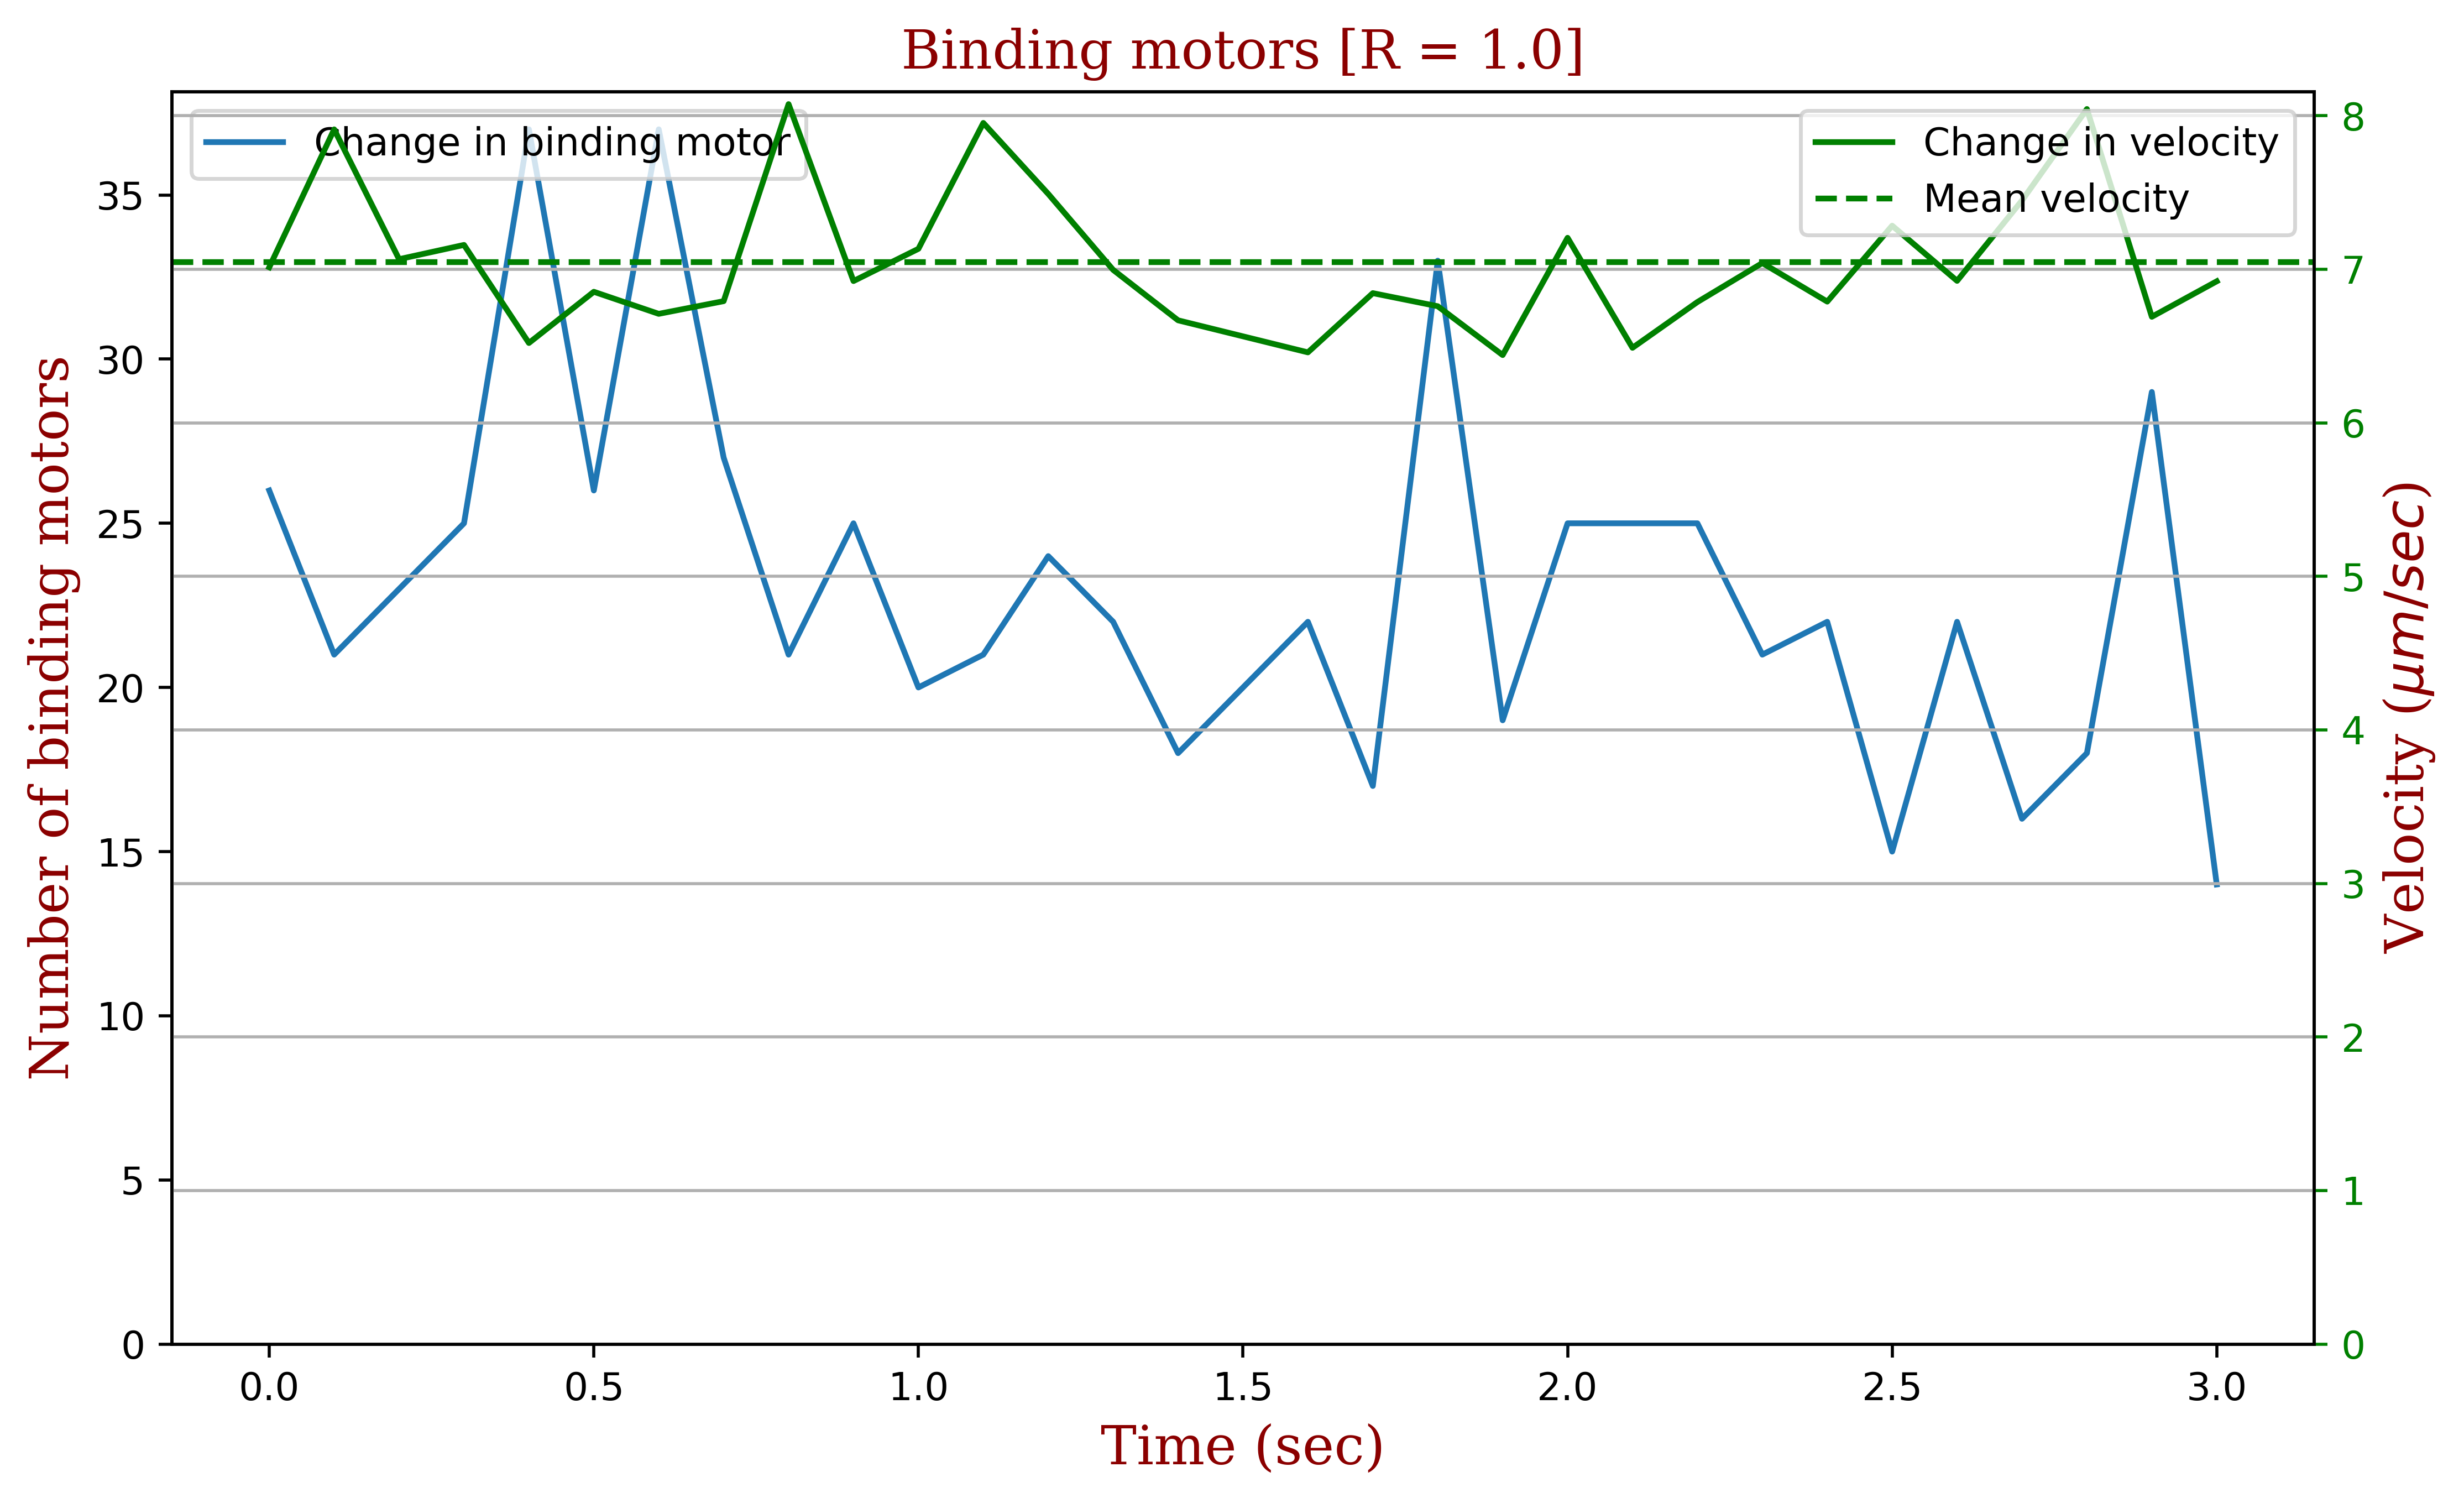

Ave_vel: 7.045905362767565
VSD: 0.4614303364745575
    time  b_m       vel
0    0.0   26  7.012470
1    0.1   21  7.910638
2    0.2   23  7.065239
3    0.3   25  7.158112
4    0.4   37  6.519449
5    0.5   26  6.852994
6    0.6   37  6.709338
7    0.7   27  6.791963
8    0.8   21  8.075079
9    0.9   25  6.922814
10   1.0   20  7.132820
11   1.1   21  7.952605
12   1.2   24  7.490344
13   1.3   22  6.995689
14   1.4   18  6.667165
15   1.6   22  6.458436
16   1.7   17  6.844087
17   1.8   33  6.758910
18   1.9   19  6.440900
19   2.0   25  7.204489
20   2.1   25  6.488104
21   2.2   25  6.786330
22   2.3   21  7.040257
23   2.4   22  6.789028
24   2.5   15  7.283388
25   2.6   22  6.924164
26   2.7   16  7.447746
27   2.8   18  8.043127
28   2.9   29  6.690199
29   3.0   14  6.921276


In [12]:
Dx_tip = np.diff(bmd10['x']); Dy_tip = np.diff(bmd10['y'])
DD=np.sqrt((Dx_tip**2)+(Dy_tip**2))
v=DD/(10*dt); Av_vel = np.mean(v)
vSD=np.sum(((v-Av_vel)**2)/(np.size(v)-1)); vSD=np.sqrt(vSD)
time = np.around(np.linspace(0,3,30,endpoint=True), decimals=1)

fig, ax1 = plt.subplots(figsize=(10,6), dpi=500)
ax1.set_xlabel('Time (sec)', fontdict=font)
ax1.set_ylabel('Number of binding motors', fontdict=font)
ax1.plot(time,bm10, label='Change in binding motor')
ax1.legend(loc='upper left')
ax1.set_ylim(bottom=0)

ax2 = ax1.twinx()
ax2.set_xlabel('Time (sec)', fontdict=font)
ax2.set_ylabel('Velocity ($\mu m/sec$)', fontdict=font)
ax2.plot(time,v, 'g', label='Change in velocity')
ax2.axhline(np.mean(v), linestyle='--', color='g', label='Mean velocity')
ax2.legend(loc='upper right')
ax2.tick_params('y', colors='g')
ax2.set_ylim(bottom=0)

plt.title('Binding motors [R = 1.0]', fontdict=font)
plt.grid()

v1 = v.reshape(30,1)
v1 = pd.DataFrame(v1)
tym = pd.DataFrame(time)
bm10_ = bm10.reset_index(drop=True)
nbm10 = pd.concat([tym, bm10_, v1], axis=1)
nbm10.columns=['time','b_m','vel']
#print(nbm10)

plt.show()
fig.savefig('actin_binding_grinding_r1.0.svg',bbox_inches='tight', format='svg')

print(colored('Ave_vel:', 'yellow', attrs=['reverse', 'blink']), \
      colored(Av_vel, 'yellow', attrs=['reverse', 'blink']))
print(colored('VSD:', 'yellow', attrs=['reverse', 'blink']), \
      colored(vSD, 'yellow', attrs=['reverse', 'blink']))

nbm10 = pd.concat([tym, bm10_, v1], axis=1)
nbm10.columns=['time','b_m','vel']
print(nbm10)

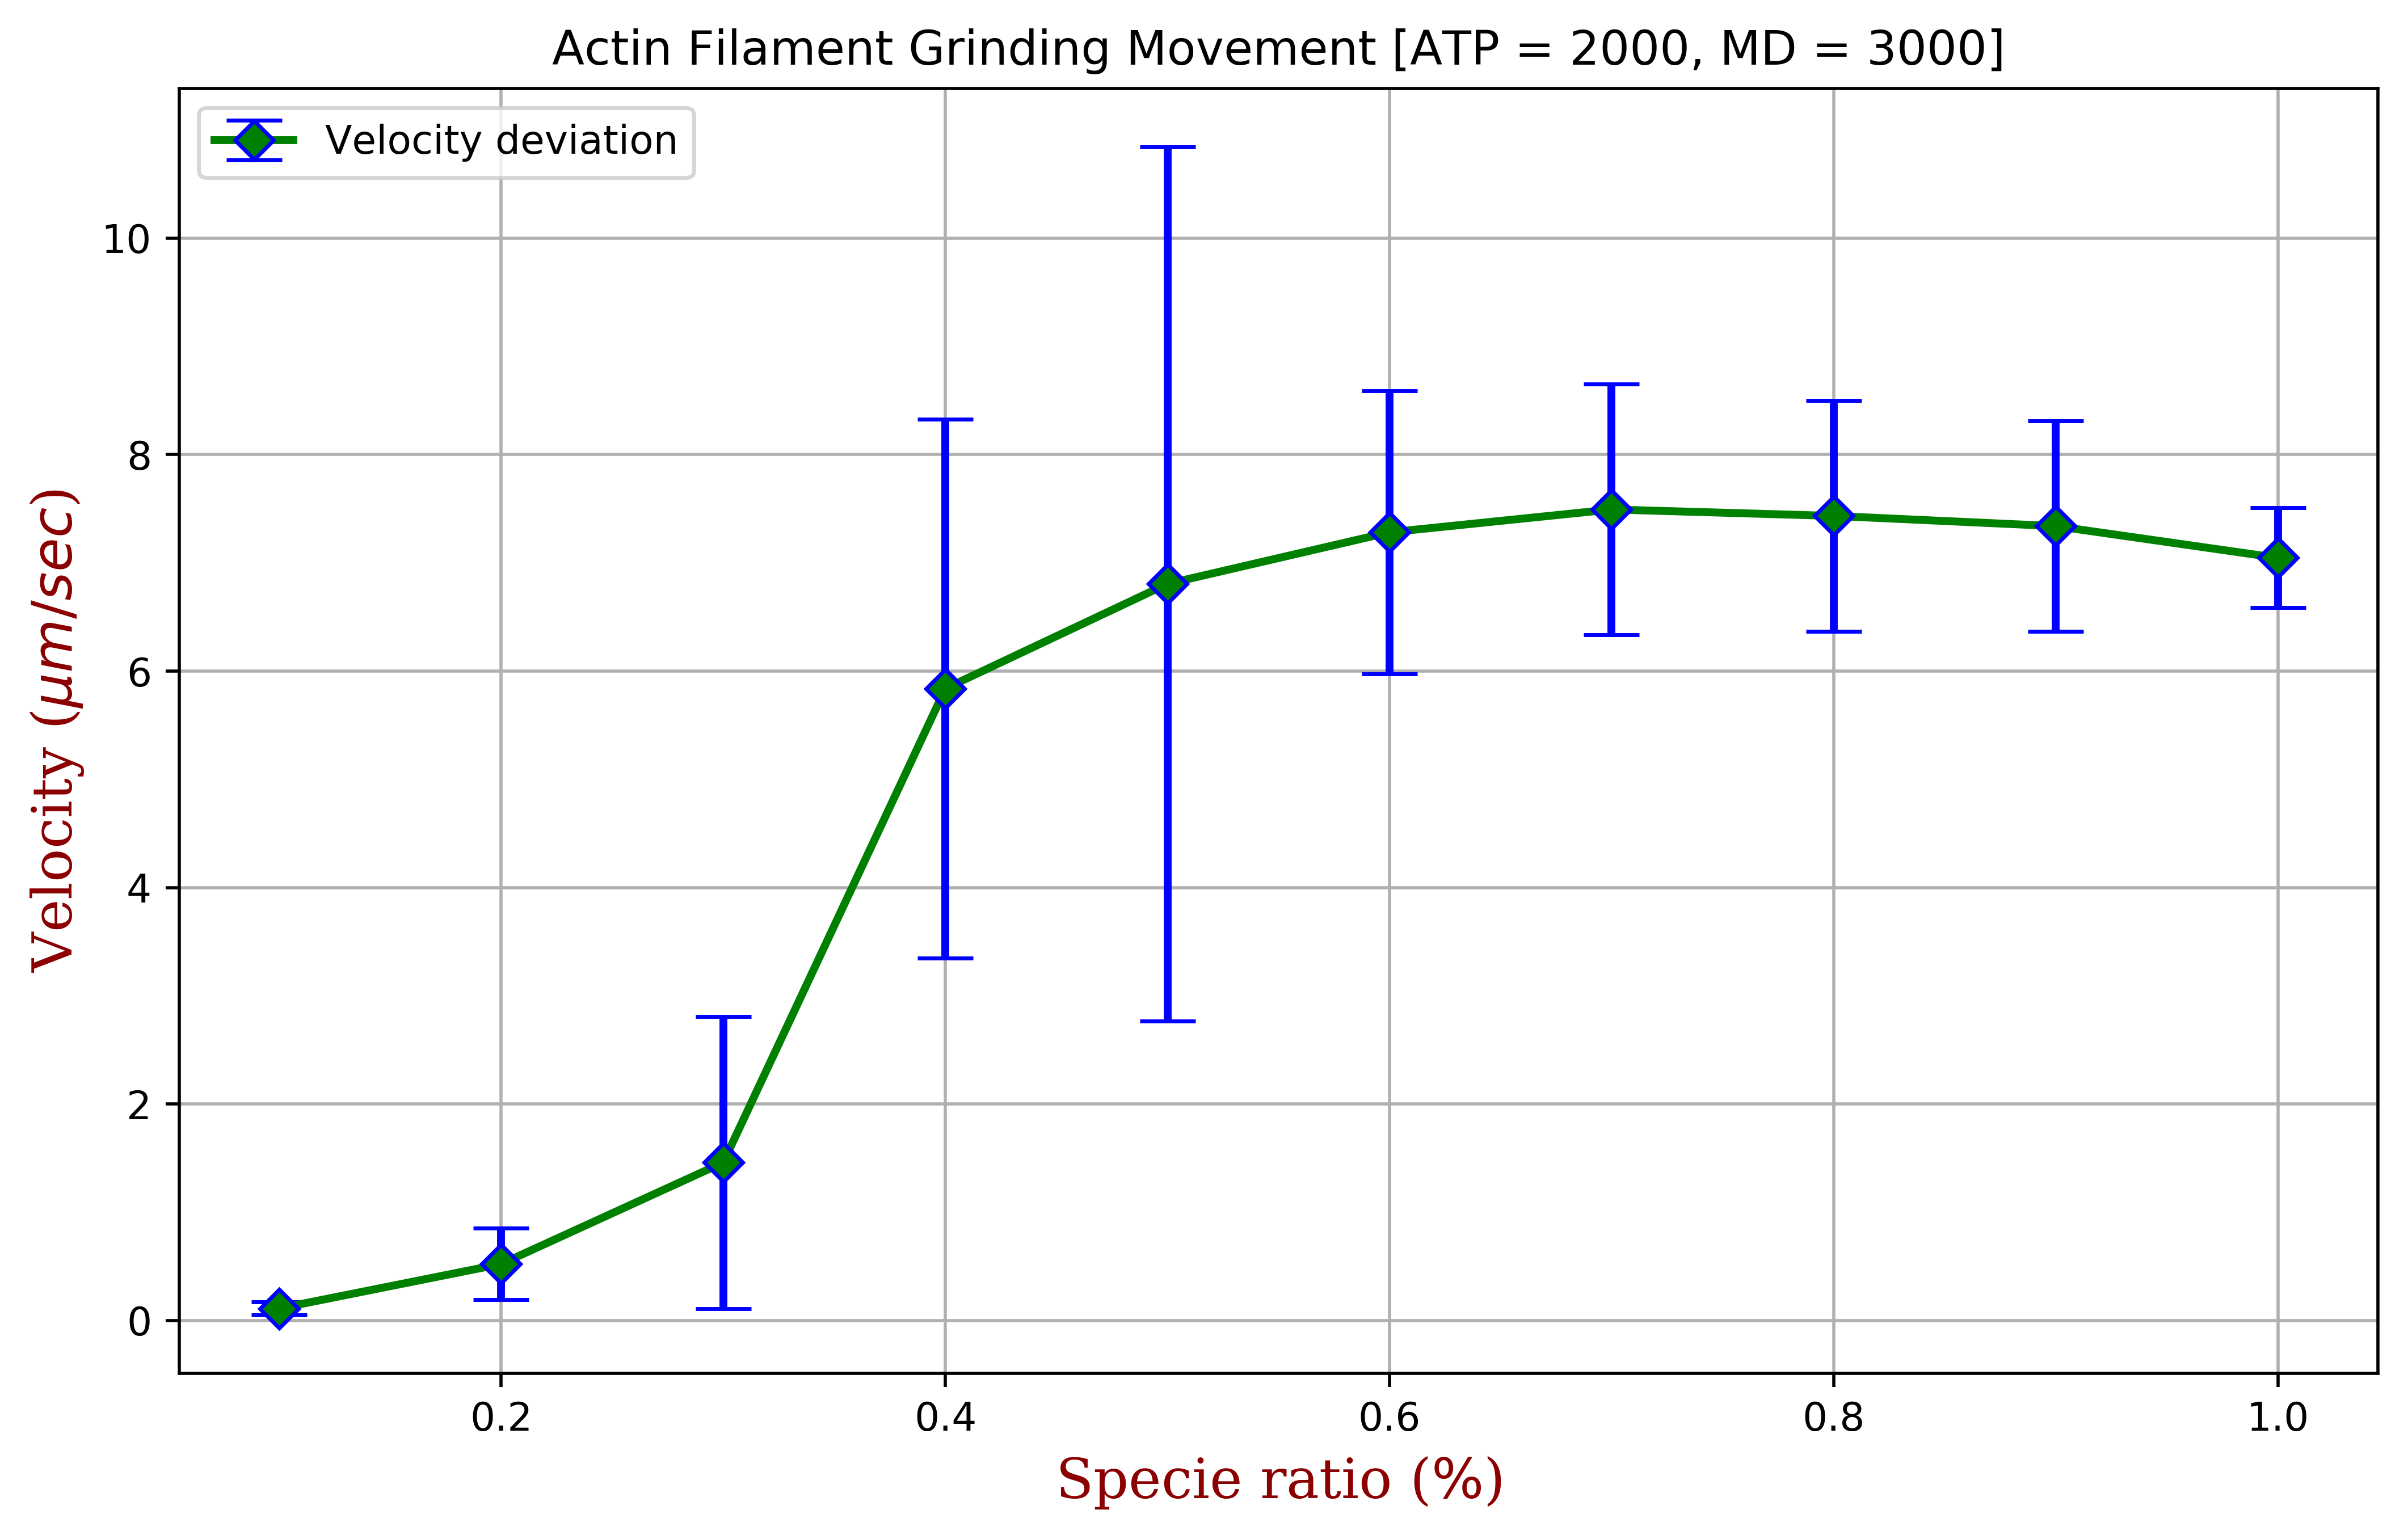

In [13]:
columns = ['r', 'b', 'atp', 'md', 'v_av', 'v_sd']
df = pd.read_csv('bm_grinding_vel.csv', names=columns)

x=df['r']; y=df['v_av']; dev=df['v_sd']
plt.figure(figsize=(10,6), dpi=500)
plt.errorbar(x,y,yerr=dev, ecolor='b', capsize=7, \
             mec='blue', color='green', marker='D', linewidth=2, \
             markersize=7, label='Velocity deviation')
plt.xlabel('Specie ratio ($\%$)', fontdict=font); plt.ylabel('Velocity ($\mu m/sec$)', fontdict=font)
plt.title('Actin Filament Grinding Movement [ATP = 2000, MD = 3000]'); plt.legend(loc='upper left'); plt.grid()
plt.savefig('actin_bm_grinding.svg',bbox_inches='tight', format='svg')

In [14]:
print(colored('Data for R, Velocity and Deviation:', 'yellow', attrs=['reverse', 'blink']))
print(df)

Data for R, Velocity and Deviation:
     r   b   atp    md      v_av      v_sd
0  0.1  13  2000  3000  0.111458  0.058371
1  0.2  13  2000  3000  0.521981  0.328898
2  0.3  13  2000  3000  1.459361  1.348586
3  0.4  13  2000  3000  5.837942  2.487600
4  0.5  13  2000  3000  6.805809  4.038781
5  0.6  13  2000  3000  7.282008  1.308636
6  0.7  13  2000  3000  7.492940  1.157437
7  0.8  13  2000  3000  7.433262  1.066001
8  0.9  13  2000  3000  7.339058  0.974277
9  1.0  13  2000  3000  7.045905  0.461430
